<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Fastai/Notas_de_la_clase7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 7 -Deep Learning for Coders**

# **Respuestas al cuestionario**

**1. ¿Qué es una variable continua?**

Una variable continua es aquella que tiene un capacidad infinita de valores para tomar. (Estas generalmente se encuentran en formatos de numeros)

**2. ¿Qué es una variable categórica?**

Asimismo, las variables categoricas son variables discretas, es decir, tienen un numero limitado de valores, a los cuales se les puede asignar. (Generalmente, se encuentran en formato de texto)

**3. Proporcione dos de las palabras que se utilizan para los posibles valores de una variable categórica.**

Levels (niveles), categories (categorias) o classes (clases).

**4. ¿Qué es una "dense layer"?**

Estas son las capas del modelo de redes neuronales (la que contienen las neuronas). Se les llaman asi, para distinguirlas de los Embeddings y de la capa de salida.

**5. ¿Cómo reducen las 'entity embeddings' el uso de memoria y aceleran las redes neuronales?**

Justamente, en la clase pasada vimos que hacer un embedding es similar a hacer un one-hot encodding. Sin embargo, en el one-hot encodding se le asigna un espacio de memoria a cada posibilidad de la categoria. En cambio con el entity embedding, podemos reducir el uso de memoria creando subgrupos para asignar los datos.

Asi es como imagino que funciona. (al final solo utiliza 3 categorias)

```
animales (#9)   one-hot encodding (#9)     entity embedding (#3)
animal_1          especie_ave_1                    ave
animal_2          especie_ave_2                    ave
animal_3          especie_ave_3                    ave
animal_4          especie_pez_1                    pez
animal_5          especie_pez_2                    pez
animal_6          especie_mamifero_1               mamifero
animal_7          especie_mamifero_2               mamifero
animal_8          especie_mamifero_3               mamifero
animal_9          especie_mamifero_4               mamifero
```

**6. ¿Para qué tipos de conjuntos de datos son especialmente útiles las 'entity enbaddings'?**

Justamente, para variables que tienen muchos grupos de categorias. En el ejemplo anterior se reduce de trabajar con 9 categorias a solo 3.

**7. ¿Cuáles son las dos familias principales de algoritmos de aprendizaje automático?**

No estoy tan seguro de si con esta pregunta se esta refiriendo a los dos algoritmos que vimos en esta clase. Random Forest y Neuronal Network.

**8. ¿Por qué algunas columnas categóricas necesitan un orden especial en sus clases? ¿Cómo haces esto en Pandas?**

Este es el caso para aquellas variables categoricas que presenten algun orden de magnitud. En la clase, esto se hace por ejemplo ordenando las clases pequeño, mediano y grande.

En Pandas se hace de la siguiente manera.

```python
import pandas as pd

columnas = {'cat1':['chico', 'mediano', 'chico', 'mediano', 'grande'], 'cat2':[1, 2, 3, 4, 5]}
df_prueba  = pd.DataFrame(columnas)
tamanos = list(df_prueba['cat1'].unique())
df_prueba['cat1'] = df_prueba['cat1'].astype('category')
df_prueba['cat1'].cat.set_categories(tamanos, ordered=True, inplace=True)
df_prueba['cat1'].unique()

>> ['chico', 'mediano', 'grande']
>> Categories (3, object): ['chico' < 'mediano' < 'grande']

```

**9. Resuma lo que hace un algoritmo de árbol de decisión.**

Al final de este notebook desarrolle el algoritmo (aunque todavia puede presentar algunos errores). En resumidas cuentas lo que se hace es:

1. Selecciono una columna (se parte con la primera columna)
2. Luego selecciono un valor de esa columna (se parte con el mas bajo)
3. Luego separo los datos en dos grupos (menores y mayores a tal valor)
4. Genero una prediccion para ambos grupos (prediccion = media(variable dependiente del grupo))
5. Recorro todos los posibles valores de la columna (segmentando en dos grupos) y voy guardando el valor que genera la menor diferencia entre los valores predichos y la variable dependiente.
6. Luego hago este proceso para cada columna.
7. Rescato la columna y su valor en especifico donde se obtuvo la menor diferencia entre los valores predichos y la variable dependiente.
8. Genero dos set de datos nuevos (menores y mayores al valor de la columna escogida), asegurandome de quitar la columna utilizada.
9. Vuelvo a ejecutar el mismo procedimiento para cada nuevo set de datos originados, hasta cumplirse alguna condicion (numero max de nodos, por ejemplo)

**10. ¿Por qué una fecha es diferente de una variable categórica o continua regular, y cómo puede preprocesarla para permitir su uso en un modelo?**

Dado que el modelo se esta haciendo en funcion de predecir valores futuros, la variable de fecha se diferencia del resto, ya esta en si permite, por ejemplo la separacion de lo que seria nuestro trainning y validation set. Asimismo, la manera que podemos procesar esta variable es la siguiente. (el metodo `add_datepart` lo proporciona la biblioteca de Fastai)

```
df = add_datepart(df, variable_temporal)
```

**11. ¿Debería elegir un conjunto de validación aleatorio en la bulldozer competition? En caso negativo, ¿qué tipo de conjunto de validación debería elegir?**

Para este caso no debiesemos escogerlos de manera aleatoria, ya que lo que estamos tratando de predecir son valores futuros. Asi, lo que tenemos que hacer es escoger alguna fecha y todos aquellos datos anteriores a esta, pasaran a ser el trainning set y todos aquellos valores posteriores pasaran a ser el validation set.

**12. ¿Qué es el 'pickle' y para qué sirve?**

Esta es la libreria que se utilizo en la clase para hacer el guardado de los datos de entrada. 


**13. ¿Cómo se calculan `mse`,` samples` y `values` en el árbol de decisiones dibujado en este capítulo?**

Para cada nodo (rama) del arbol
 - mse: Primero se calcula el promedio sobre la muestra (sample), este valor pasa a ser la prediccion. Luego, a cada valor de la variable dependiente (de la muestra) se le resta la prediccion y se elevan al cuadrado. Por ultimo se calcula el promedio de todos estos valores (los que estan al cuadrado).
 - sample: Es la cantidad de datos que existen en cada nodo producto de la separaciones que se van realizando a medida que se desciende en el arbol (para el primer nodo, estos correspoden a todos los datos)
 - values: Este valor es el promedio sobre la muestra (lo que tambien se entiende como la prediccion)


**14. ¿Cómo manejamos los valores atípicos antes de construir un árbol de decisiones?**

Estos los podemos ir analizando con los graficos de la biblioteca `dtreeviz`. Claro, esto se realiza luego de construir el modelo y probarlo con los datos. Luego, si observamos irregularidades podemos ir quitando o reemplazando estos valores.


**15. ¿Cómo manejamos las variables categóricas en un árbol de decisiones?**

La manera tradicional es agregando nuevas columnas, las que adquieren un significado como 1 si categoria, 0 en otro caso(dummies). Sin embargo, en la clase nos indican que hacer esto requiere un manejo computacional mas complejo $2^{k}-1$ cantidad de particiones (siendo k el numero de categorias de la columna). En este sentido, primero nos recomiendan ordenar las categorias y luego hacer las particiones, reduciendo asi la complejidad a $k-1$ cantidad de segmentaciones.

Explicado asi, como que no se entiende mucho. Por eso, espero que queda mas claro en el siguiente dibujo.

**Metodo Tradicional (4 categorias -> 7 particiones)**

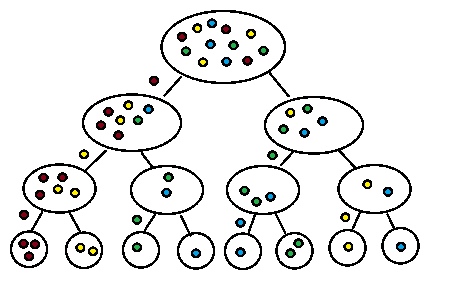

**Metodo Ordenado (4 categorias - 3 particiones)**

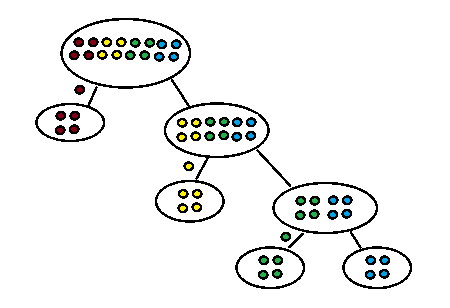

**16. ¿Qué es 'bagging'?**

El concepto de bagging, esta relacionado al metodo de random forest. Lo que sugiere este concepto es armar varias versiones de un predictor (para armar estas versiones se modifican los datos que se utilizan para construirlos) y luego estimar un valor en base a esta 'bolsa' de predictores (se calcula la media de las predicciones de todos los predictores)

**17. ¿Cuál es la diferencia entre `max_samples` y` max_features` al crear un bosque aleatorio?**

`max_sample`: Es para indicar cuantas filas de datos son posibles de extraer como maximo para armar una muestra.

`max_features`: Es para indicar el maximos de columnas (se especifica en porcentaje) con las que se van a poder armar los arboles de decision.

**18. Si aumenta `n_estimators` a un valor muy alto, ¿puede provocar un sobreajuste? ¿Por qué o por qué no?**

La respuesta es que no, y la razon es que todos estos predictores al ser generados aleatoriamente, estos seran independientes unos con otros.

**19. En la sección "Creación de un bosque aleatorio", justo después de <<max_features>>, ¿por qué `preds.mean (0)` dio el mismo resultado que nuestro bosque aleatorio?**

Si no me equivoco, se estan refiriendo a estas dos lineas de codigo.

```python
m_rmse(m, valid_xs, valid_y)
>> 0.233975

r_mse(preds.mean(0), valid_y)
>> 0.233975
```

En el primero codigo, se esta calculando el promedio de los RMSE de los arboles del random forest. En el segundo, se esta calculando la raiz, entre el promedio de las predicciones y los datos de validacion.

\begin{equation}
Eq_{1} = \frac{1}{n}\sum_{arbol=1}^{n} \sqrt{\frac{\sum_{dato=1}^{m}(y_{arbol, dato}-y_{arbol, dato}^{'})^2}{m}} 
\end{equation}

\begin{equation}
Eq_{2} = \sqrt{\frac{\sum_{dato=1}^{m}(y_{dato}-\frac{\sum_{arbol=1}^{n}y_{arbol, dato}^{'}}{n})^2}{m}} 
\end{equation}

Viendolo asi, es super dificil darse cuenta que son los mismos elementos. Pongamonos una tarea mas sencilla y miremos solo el dato=1.

\begin{equation}
Eq_{1} = \frac{\sum_{arbol=1}^{n}(y_{arbol, 1}-y_{arbol, 1}^{'})}{n} = \frac{\sum_{arbol=1}^{n}y_{arbol, 1}}{n}-\frac{\sum_{arbol=1}^{n}y_{arbol, 1}^{'}}{n} = y_{1}-\frac{\sum_{arbol=1}^{n}y_{arbol, 1}^{'}}{n} = Eq_{2}
\end{equation}

Luego, faltaria hacer lo mismo para todos los datos.

**20. ¿Qué es "out-of-bag-error"?**

Este lo dejo mas claramente explicado abajo, pero lo que se mide con este es que tan bien predice el modelo (random forest) sobre el mismo set de entrenamiento. La gracia es que se mide para todos los arboles de decision, con datos para los cuales no fueron fabricados (estos quedaron fuera de su elaboracion cuando se hace la asignacion aleatoria de filas)

**21. Haga una lista de las razones por las que el error del conjunto de validación de un modelo podría ser peor que el error OOB. ¿Cómo podrías probar tus hipótesis?**

En teoria, el oob adquiere una funcionalidad similar al del validation set (dado que en ambas se ponen a prueba los arboles con informaciones que nunca antes han visto). En este sentido, uno esperaria que los resultados que se obtuvieran de ambos conjuntos arrojaran valores similares. En el caso de que no fuera asi (y esto se observo para el caso de la clase), lo mas probable es que exista algo **'raro'** en el conjunto que muestre mayor error por sobre el otro.

A que me refiero con algo **'raro'**:

1. Que existan columnas con una fuerte influencia temporal.
2. Que existan patrones (mas alla de los temporales) que derrumben la hipotesis de poseer un set de validacion homogeneo (uno, esperaria que este fuera parecido al de entrenamiento, por ejemplo, en la frecuencia de datos)
3. Que en ciertos conjuntos de datos existan categorias que en otros no.

La menera de ir probando estas hipotesis, es ir investigando por:

 - Tree Variance for Prediction Confidence
 - Feature Importance
 - Redundant Features
 - Partial Dependence
 - Out of Domain

**22. Explique por qué los bosques aleatorios son adecuados para responder cada una de las siguientes preguntas:**

- ¿Qué confianza tenemos en nuestras predicciones utilizando una fila de datos en particular?

 - Podemos medir la desviacion estandar de las predicciones de los arboles para ese dato en particular. Asi, mientras menor sea la variacion entre las predicciones, existira un mayor concenso de los predictores (una respuesta mas segura)
   
- Para predecir con una fila de datos en particular, ¿cuáles fueron los factores más importantes y cómo influyeron en esa predicción?

 - Esto lo podemos averiguar con el metodo `feature_importances_` (va registrando, para cada columna de cada arbol, cuanto mejora la prediccion, cuando se genera una segmentacion)

- ¿Qué columnas son los predictores más fuertes?

 - Esto puede quedar mas claro si hacemos un grafico de cascada, ya que con este podemos observar la manera en que impacta cada columna sobre la prediccion de la variable dependiente (asi, las barras mas grandes del grafico, corresponde a las columnas que mas afectan a la prediccion)

- ¿Cómo varían las predicciones al variar estas columnas?

 - Para hacer esto, simplemente tenemos que sacar la columna del dataframe y volver a hacer las predicciones (luego observamos si hubo un mejor desempeño en las predicciones con el validation set)

**23. ¿Cuál es el propósito de eliminar variables sin importancia?**

Aparte de que estaremos trabajando con un modelo mas sencillo, será mas facil darle una interpretacion a las columnas restantes, puesto que tienen un rol mas influyente en las predicciones. 

**24. ¿Cuál es un buen tipo de gráfico para mostrar los resultados del intérprete de árboles?**

En la clase se recomienda utilizar el grafico de cascada, ya que en este se puede observar relacion (positiva o negativa) entre las variables independientes con la variable dependiente al momento de hacer una pedriccion sobre un dato. 

**25. ¿Qué es el "problema de la extrapolación"?**

El problema de la extraolacion, es que estos modelos presentan dificultades para generar predicciones cuando el dato de entrada (sobre el cual se pretende predecir), incluye alguna informacion nunca antes vista en el conjunto de entrenamiento (out of domain).Asi, al modelo le resulta dificil extrapolar, ya que no sabe como manejar esta nueva categoria (porque nunca la segmento antes).

**26. ¿Cómo puede saber si su conjunto de validación se distribuye de manera diferente a su conjunto de entrenamiento?**

En la clase se propone un metodo bastante creativo, y es que recomiendan armar un modelo de random forest, pero con el objetivo de generar predicciones de si el dato de entrada correponde a uno de entrenamiento o a uno de validacion. Para esto, primero tengo que etiquetar los datos (1 validacion, 0 entrenamiento) y, luego de armado el modelo, mirar los resultados de las predicciones. (En teoria, un conjunto homogeneo no debiese tener columnas que delaten que tipo de dato estamos tratando, asi que es una buena idea hacer un analisis con el `feature_importances_`)

**27. ¿Por qué nos aseguramos de que `saleElapsed` sea una variable continua, aunque tenga menos de 9.000 valores distintos?**

La razon, es que nos interesa que el modelo sea capaz de extrapolizar valores, mas alla de los 9000 que aparecen.

**28. ¿Qué es "boosting"?**

De esto, se nos hablan al final de la clase, y se refiere a un modelo en el cual, podriamos decir que se va 'designando los trabajos y las responsabilidades'. Es decir, si para el modelo de random forest, el resultado es el promedio del trabajo de todos los arboles. Con boosting, cada arbol va generando las partes del resultado, asi la suma de todas las partes nos generan la prediccion. (esto se va desarrollando iterativamente, asi cada predictor intenta explicar el error remanente del predictor anterior)

**29. ¿Cómo podríamos usar embeddings con un random forest? ¿Esperaríamos que esto ayudara?**

No estoy tan seguro de si esto seria factible de hacerse, pero lo primero que se me viene a la mente, es imaginar a cada arbol como si se tratase de un usuario, a cada dato como un item (o pelicula, como vimos en la clase anterior) y en el cruce se encontrarian los ranking o predicciones de los usuarios sobre los items. Si llegaramos a realizar una cosa asi, quiza se pueda estraer una informacion adicional, como que la combinacion de tres columnas funcionan mejor que si se trabajasen por separado.

**30. ¿Por qué no siempre podemos usar una red neuronal para el modelado tabular?**

No estoy seguro de si se referira a esto, pero el modelo de red neuronal, generalmente, tiende a tardar mucho mas en su entrenamiento (tambien requiere GPU en la mayoria de los casos). En este sentido, es un buen punto de partida desarrollar un random forest e ir simplificando algunas informaciones que podrian llegar a ser irrelevantes en las predicciones. Tambien, hay que tener ojo con columnas que presentan una gran de categorias, ya que, para que funcionen en un modelo de red neuronal hay que generar su matriz de embedding.


# **Tabular modeling deep dive**

# **Preparativos**

In [ ]:
# Importamos las bibliotecas
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8


     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 60 kB 7.4 MB/s 
     |████████████████████████████████| 1.2 MB 33.7 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 186 kB 30.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 272 kB/s 


## Descargando los datos desde Kaggle


1. Primero ir a esta pagina Link: https://www.kaggle.com/c/bluebook-for-bulldozers
2. Segundo hay que registrarse.
3. Luego, verificar con el codigo al celular
4. Despues, ir al perfil, en la seccion 'account' y dar en 'create new API token' (aqui se crea el archivo kaggle.json)
6. Por ultimo, ir a la seccion de reglas (rules) y dar a aceptar las condiciones.


Cuando ya tengamos el archivo, hay que arrastrarlo aqui.

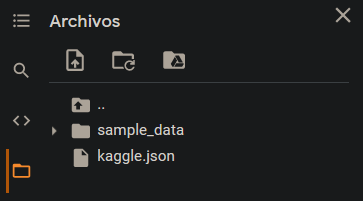



In [ ]:
ruta_archivo = '/content/kaggle.json'
contenido = ''
with open(ruta_archivo) as f:
  for i in f:
    contenido = i
    
print(type(contenido))

<class 'str'>


In [ ]:
creds = contenido
#print(creds)

In [ ]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()

In [ ]:
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [ ]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [ ]:
from kaggle import api

In [ ]:
api.competition_download_cli('bluebook-for-bulldozers', path=path)
path.ls()

100%|██████████| 48.4M/48.4M [00:00<00:00, 131MB/s]

(#1) [Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip')]

In [ ]:
! unzip -q -j {'/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'} -d path

In [ ]:
path = Path('/content/path')
path.ls()

(#14) [Path('/content/path/Train.7z'),Path('/content/path/random_forest_benchmark_test.csv'),Path('/content/path/Test.csv'),Path('/content/path/Data Dictionary.xlsx'),Path('/content/path/Train.zip'),Path('/content/path/TrainAndValid.7z'),Path('/content/path/median_benchmark.csv'),Path('/content/path/Valid.csv'),Path('/content/path/TrainAndValid.csv'),Path('/content/path/ValidSolution.csv')...]

# **Mirando los datos**

In [ ]:
# Cargamos los datos a un dataframe
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [ ]:
# Pasamos a ver el nombre de las columnas
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
# Lo que podemos hacer ahora es revisar el tipo de datos que se encuentran contenidos 
# en las columnas (por ejemplo, para ProductSize)
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [ ]:
# definimos las categorias que encontramos
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [ ]:
# Aqui transformamos esta columna en una de tipo categoria
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df['ProductSize'].unique()

[NaN, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [ ]:
# En el problema se platea como objetivo predecir la variable de precio de venta
dep_var = 'SalePrice'

In [ ]:
# Pero, no como aparece normalmente, sino que piden predecir el logaritmo del precio de venta
df[dep_var] = np.log(df[dep_var])
df[dep_var].head()

0    11.097410
1    10.950807
2     9.210340
3    10.558414
4     9.305651
Name: SalePrice, dtype: float64

# **Decision trees**

## Manejando los datos

In [ ]:
# antes de continuar, miremos un poco esta columna
df['saledate'].head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [ ]:
# claramente vamos a tener que hacer algo con esta columna.
# el comando add_datepart() sacara esta columna y la utilizara para ordenar los datos
df = add_datepart(df, 'saledate')
df.head()

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,...,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,...,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,...,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,...,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,...,False,False,False,1.248307e+09


In [ ]:
# aqui hacemos lo mismo
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [ ]:
# REVISAR LOS COMENTARIOS DE ESTA LINEA DE CODIGO
## LO UNICO QUE ESTA HACIENDO ES REGRESAR UN STR 
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

## **Usando pandas y tabularproc**

In [ ]:
# Si no me equivoco, esto es para transformar a variable categoricas y rellenar valores
# nulos con la media del resto de los datos
procs = [Categorify, FillMissing]

In [ ]:
df = add_datepart(df, 'saledate')


In [ ]:
# Generar las condiciones para separar lo que serian los conjuntos de entrenamiento
# y el conjunto de validacion
## Ojo que commo estamos tratando de predecir valores en el futuro, debemos hacer
## una segmentacion de los datos, basados en una condicion temporal
cond = (df.saleYear<2011) | (df.saleMonth<10)

# Aqui definimos los conjuntos (se guardan el indice de las filas)
## Esto se traduce como:
## Conjunto de entrenamiento: Todas aquellas filas anteriores octubre de 2011
## Conjutno de validacion: Todas aquellas filas luego de octubre de 2011
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))


In [ ]:
print('conjunto entrenamiento: ', len(splits[0]))
print('conjunto validacion: ', len(splits[1]))

conjunto entrenamiento:  404710
conjunto validacion:  7988


In [ ]:
doc(cont_cat_split)

In [ ]:
# Aqui hacemos la separacion de variables continuas y categoricas
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
print('variables continuas: ', cont[:2], '...')
print('variables categoricas: ', cat[:2], '...')


variables continuas:  ['SalesID', 'MachineID'] ...
variables categoricas:  ['UsageBand', 'fiModelDesc'] ...


In [ ]:
doc(TabularPandas)

In [ ]:
# Con este objeto, se van a aplicar los procedimientos que definimos antes
# Categorify y FillMissing
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(404710, 7988)

In [ ]:
# Aqui podemos ver la forma en que estan ordenados los datos
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [ ]:
# Ahora si queremos ver como este metodo trabaja las variables categoricas, hagamos
# lo siguiente.
## Definamos otro de estos objetos (mas pequeño) solo con variables categoricas
to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names=dep_var, splits=splits)
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [ ]:
# Ahora, para ver como quedan cuando se ocupa el modelo, podemos utilizar el metodo items
to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


In [ ]:
# De la misma manera, asi es coo se ven todas las variables cuando las hacemos pasar
# al modelo (solo numeros, siendo esto lo que buscamos)
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [ ]:
# Tambien, y al igual que antes, podemos consultar por las clases presentes en una columna
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [ ]:
# Por ultimo, podemos guardar uno de estos archivos .plk, para utilizarlo mas adelante
save_pickle('/content/to.pkl',to)

Ojo que esto lo va a guardar como un archivo temporal. Luego si se quiere guardar en el PC se puede descargar, haciendo click derecho en la opcion descragar.

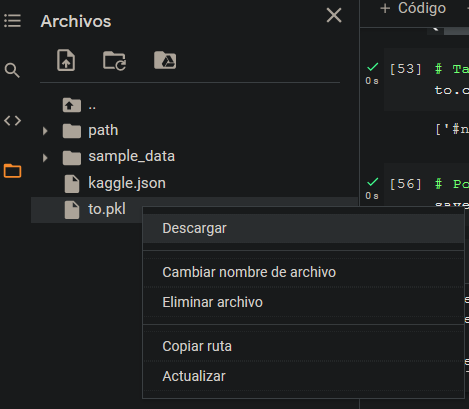

### **Esto es para volver a cargar los datos**

Dado que las clases estan diseñadas para trabajar desde un jupyter notebook y no desde google collab, este vendria a ser el metodo equivalente para cargar el archivo.

Nota: Si se guarda el archivo en drive, existe otro metodo con el cual se podrian cargar los datos mas rapido.

In [ ]:
import pickle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
archivo = open('/content/to.pkl', 'rb')
to = pickle.load(archivo)

In [ ]:
to.show(3)

## **Usando decision trees**

In [ ]:
# A partir de este punto, ya vamos a utilizar una biblioteca especifica para 
# trabajar con modelos de arboles de decision

## Asi, lo primero que vamos a hacer es separar los datos entre los que son 
## de entramiento y validacion, y las variables independientes de la dapendiente
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
# Lo unico que debemos hacer es ejecutar las siguientes lineas de codigo
## Notar que el parametro max_leaf_nodes determina cuantos nodos queremos al
## final del arbol (mirar la figura de mas abajo)
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

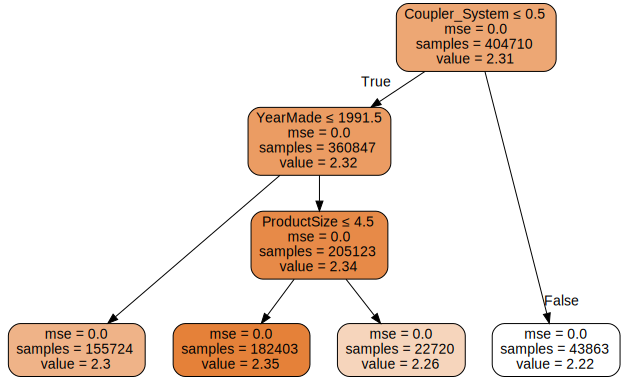

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

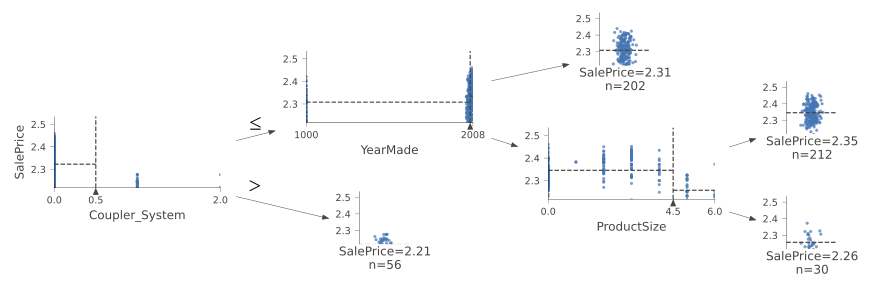

In [ ]:
# Con estas lineas de codigo podemos visualizar como se esta hacienda la separacion 
# binaria en los datos de entrenamiento
## Ojo, si prestamos atencion al grafico de 'YearMade' es claro que existe un error
## puesto que es raro que existan datos del año 1000
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# Asi, con estas linea de codigo resolvemos este problema
# cambiando todos los datos que tengan un año anterior al 1900 por 
# el año 1950
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

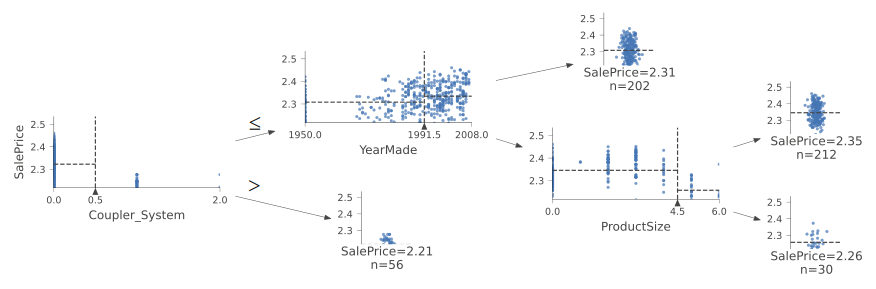

In [ ]:
# volvemos a cargar el modelo y a obserar los datos
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# Aqui vamos a volver a hacer el modelo, pero sin especificar cuantos nodos al final
m = DecisionTreeRegressor()
m.fit(xs, y);

In [ ]:
# raiz del error cuadratico medio
def r_mse(pred,y): 
  return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
  return r_mse(m.predict(xs), y)

In [ ]:
# Este es el error que se obetiene con el set de entrenamiento
## Similar al que vemos con el training loss
m_rmse(m, xs, y)

2.2e-05

In [ ]:
# Sin embargo, el que realmente nos debiese interesar es este (el de validacion)
m_rmse(m, valid_xs, valid_y)

0.033475

In [ ]:
# Aqui podemos ver que el numero total de nodos en el mdoelo es gigantesco, y claro mientras mas
# nodos tengamos, mas certero sera nuestro modelo SOBRE EL CONJUNTO DE ENTRENAMIENTO
# Esto es similar al fenomeno de overfitting que veiamos en los modelos de redes neuronales
m.get_n_leaves(), len(xs)

(323932, 404710)

In [ ]:
# Ahora, intetemos reducir el numero de nodos al final y veamos como son los resultados ahora
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
print('Error sobre le conjunto de entrenamiento: ', m_rmse(m, xs, y))
print('Error sobre le conjunto de validacion: ', m_rmse(m, valid_xs, valid_y))

# Era esperable que el modelo ahora predijera peor sobre el conjunto de entramiento,
# pero lo que realmente importa, es que este predice un poco mejor sobre el conjunto
# de validacion. Asi podemos asegurar que este modelo puede generalizar de mejor forma
# los datos.

Error sobre le conjunto de entrenamiento:  0.025244
Error sobre le conjunto de validacion:  0.032202


In [ ]:
# este es ahora el numero total de nodos presentes en el modelo
m.get_n_leaves()

12355

# **Random forest**

In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
# raiz del error cuadratico medio
def r_mse(pred,y): 
  return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
  return r_mse(m.predict(xs), y)

## **Creando un random forest**


In [ ]:
# con esta linea de codigo vamos a generar el random forest
# Este lo vamos a especificar con las siguientes caracteristicas
## vamos a generar 40 arboles de decision utilizando muestras de 
## un maximo de 200.000 datos del set de entrenamiento.
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.170751, 0.232566)

In [ ]:
# El n_estimators se refiere al numero de tree decisions que contiene el random forest
# Asi, se estan guardando todas las predicciones para cada fila del conjunto de validacion
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape # asi, cada arbol genera una prediccion para cada fila del conjunto de validacion

(40, 7988)

In [ ]:
# estamos calculando el promedio de la prediccion de cada arbol para cada fila
print(preds.mean(0).shape)
r_mse(preds.mean(0), valid_y)

(7988,)


0.232566

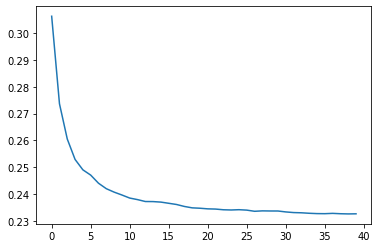

In [ ]:
# veamos como disminuye el error sobre la prediccion a medida que utilizamos
# mas arboles de decision
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

## **Out-of-Bag error**

Lo que se hace con esta medida es analizar que tan bien predicen los arboles del random forest sobre las filas del conjunto de entrenamiento que no se usaron en su elaboracion. Esto es medio confuso de explicar, pero quiza quede mas claro con el siguiente ejemplo.

 - Supongamos que nuestro conjunto de entrenamiento tiene 4 datos (filas 1 - 2 - 3 - 4)
 - Acto seguido, planeo elaborar dos arboles de decision (recordar que estos poseen una cantidad de columnas al azar).
  - El arbol 1 fue entrenado con los datos 1
  - El arbol 2 fue entrenado con los datos 3 y 4

- Asi el `oob_prediction_` hace lo siguiente.

```
                dato 1 | dato 2 | dato 3 | dato 4
        arbol 1          y1(x2)   y1(x3)   y1(x4)
        arbol 2 y2(x1)   y2(x2)

oob_prediction=[y2(x1), y1(x2)+y2(x2)/2, y1(x3), y1(x4)]
```
 - Por ultimo, al hacer `r_mse(m.oob_prediction_, y)` es similar a cuando mirabamos el error del modelo sobre el set de entrenamiento.



In [ ]:
# Esta medida es interesante de analizar, ya que mide que tan bien predicen los
# arboles sobre datos para los cuales no fueron entrenados
r_mse(m.oob_prediction_, y)

0.21055

## **Interpretacion del modelo**

### **Tree variance for prediction confidence**

Esto nos ayuda a observar sobre el conjunto de validacion, la variacion en las predicciones de los arboles (medidos en terminos de desviacion estandar)
 - Como conlusion se puede observar el dato o datos para los cuales los arboles entran en mayor conflicto al hacer sus predicciones.


In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(40, 7988)

In [ ]:
preds_std = preds.std(0)
preds_std.shape

(7988,)

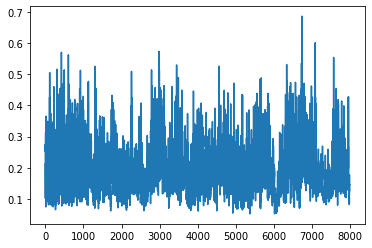

In [ ]:
import matplotlib.pyplot as plt

# esto es para visualizar las variaciones
y = preds_std
plt.plot(y)
plt.show()

# Mirando el grafico pareciera que el dato que menos confianza tienen los modelos al predecir
# se encuentran en el rando de 6000 a 7000

In [ ]:
# Si uno quisiese ver este valor se podria hacer de la siguiente manera
valor_conflictivo = np.argmax(y)
valor_conflictivo # jaja, por ahi andaba

6735

In [ ]:
preds_std[:5]

array([0.21281473, 0.13708479, 0.1020984 , 0.27575122, 0.1359917 ])

### **Feature importance**

Lo que se hace con esta funcion es:
 - Recorrer todos los arboles
 - Luego recorrer todas las separaciones (categorias)
 - Y para cada una de estas separaciones se mide cuanto mejora el modelo
 - De esta manera para cada categoria registramos la suma de estas mejoras
 - Por ultimo, normalizamos todo, para que la suma de las mejoras en las categorias den 1

In [ ]:
# esta funcion nos ayuda a determinar las columnas que impactan mas
# profundamente en las predicciones del modelo
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
# Aqui por ejemplo podemos ver las mas importantes
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.172778
6,ProductSize,0.110476
30,Coupler_System,0.103815
7,fiProductClassDesc,0.081835
54,ModelID,0.055008
65,saleElapsed,0.050913
32,Hydraulics_Flow,0.048036
3,fiSecondaryDesc,0.046653
31,Grouser_Tracks,0.042892
1,fiModelDesc,0.031058


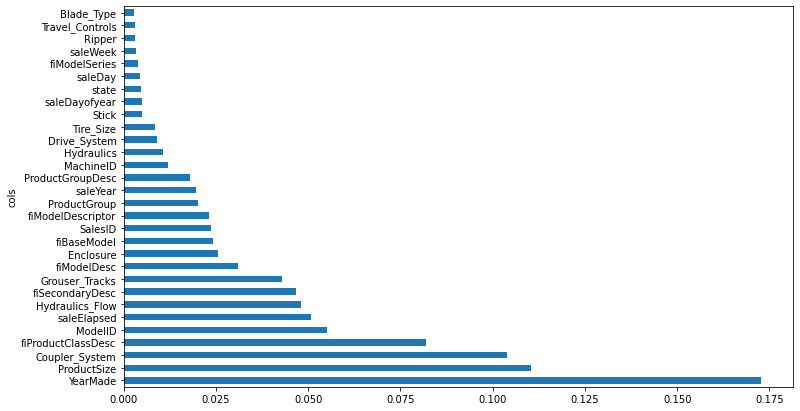

In [ ]:
# Mirando el grado de importancia
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

### **Removing Low-Importance Variables**

In [ ]:
# Aqui vamos a eliminar aquellas columnas que presenten un grado de importancia
# menor a un 0.005. Si mal no recuerdo inicialmente estabamos trabajando con un 
# df con mas de 60 columnas, asi, de esta manera podemos trabajar con un modelo
# mas sencillo y sin arriesgar eliminar columnas importantes del modelo.
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [ ]:
# Aqui nos quedamos con 21 columnas
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
y = to.train.y

In [ ]:
# volvemos a cargar el modelo
m = rf(xs_imp, y)

In [ ]:
# Aqui verificamos que los resultados para el conjunto de validacion no fueron
# mayormente afectados
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181189, 0.231001)

In [ ]:
# columnas al inicio | columnas actuales
len(xs.columns), len(xs_imp.columns)

(66, 21)

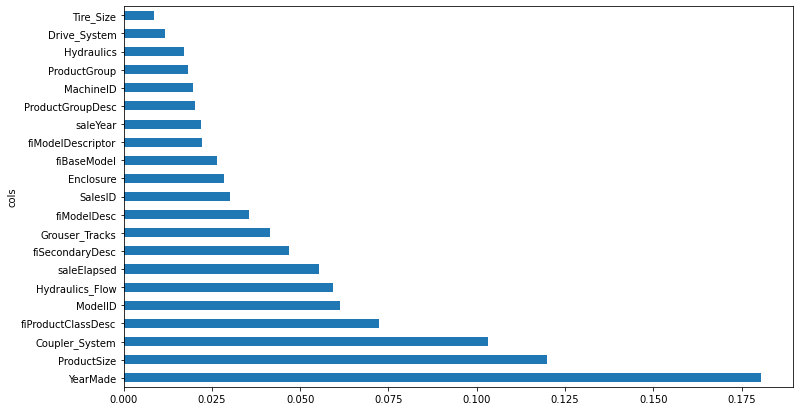

In [ ]:
# aqui nuevamente podemos mirar el grado de importancia de las columnas restantes
plot_fi(rf_feat_importance(m, xs_imp));

### **Removing Redundant Features**

Lo siguiente que puede ser util es remover aquellas categorias que se encuentren fuertemente correlaciondas. Por ejemplo, para otro tipos de datos, podriamos encontrarnos la edad de las personas y sus fechas de nacimiento. Para este caso, no es de extrañar que ambas categorias se encuentren fuertemente correlacionada y en este sentido, es facil intuir que descartar una de esta no generará una mayor repercusion en el desempeño predictivo del modelo.

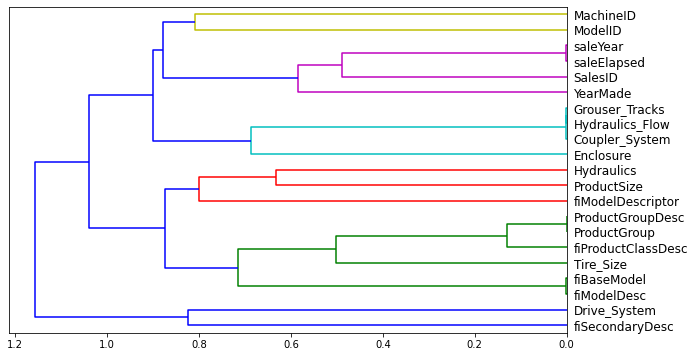

In [ ]:
# Esta funcion justamente nos ayuda a visualizar aquellas ccategorias
# que podrian ser redundantes en el modelo
cluster_columns(xs_imp)

In [ ]:
# vamos a utilizar el oob como nuestro indicador de rendimiento
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
# partimos calculando el rendimiento base del modelo predictivo
get_oob(xs_imp)

0.8774136985526914

In [ ]:
# Lo que vamos a hacer ahora es ir quitando las columnas que parecian conflictivas
# en la grafica anterior (muy unidas en la derecha) una por una e ir veridicando
# como se comporta el modelo eliminando algunas de estas.
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'Coupler_System': 0.8774419048106646,
 'Grouser_Tracks': 0.8777013245149607,
 'Hydraulics_Flow': 0.8774862042531026,
 'ProductGroup': 0.877889684371276,
 'ProductGroupDesc': 0.8766645554471493,
 'fiBaseModel': 0.8762130044937323,
 'fiModelDesc': 0.8760544879093712,
 'saleElapsed': 0.8727307284714371,
 'saleYear': 0.876640816308446}

In [ ]:
# Observemos que pasa cuando quitamos todas estas columnas que parecen ser redundantes
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8747175446563822

In [ ]:
# Corregimos los conjuntos de entrenamiento y de validacion
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
# Antes de continuar, podemos guardar los cambios que hemos hecho
save_pickle('/content/xs_final.pkl', xs_final)
save_pickle('/content/valid_xs_final.pkl', valid_xs_final)

In [ ]:
xs_final = load_pickle('/content/xs_final.pkl')
valid_xs_final = load_pickle('/content/valid_xs_final.pkl')

In [ ]:
# Ya por ultimo, verificamos si el desempeño en el conjunto de validacion
# se vio afectado
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.18338, 0.233661)

### **Partial dependence**

Lo que se intenta hacer en esta seccion es medir el efecto, lo mas aislado posible, de una variable independiente sobre la variable dependiente. Para esto, se hace lo siguiente:

 - Primero se selecciona una variable (columna)
 - Luego fijamos todas las columnas restantes y hacemos una prediccion para cada valor que pueda tomar la variable seleccionada.

 Eso es lo que muestran los graficos de dependencias del final.

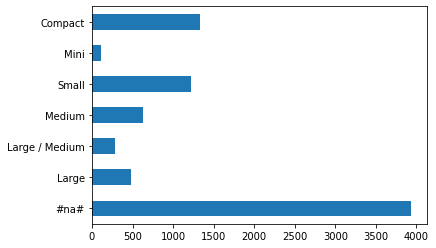

In [ ]:
# Con esto podemos observar la frecuencia de los valores presentes en alguna columna
# Esto se hizo asi, ya que la columna 'ProductSize' es del tipo categoria
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

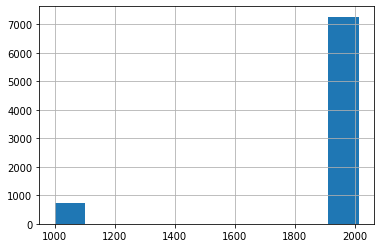

In [ ]:
# En cambio, para columnas de tipo numericas, se terminan haciendo rangos en el
# eje x. Con lo cual resulta mas facil observar los datos en formato de histograma
ax = valid_xs_final['YearMade'].hist()

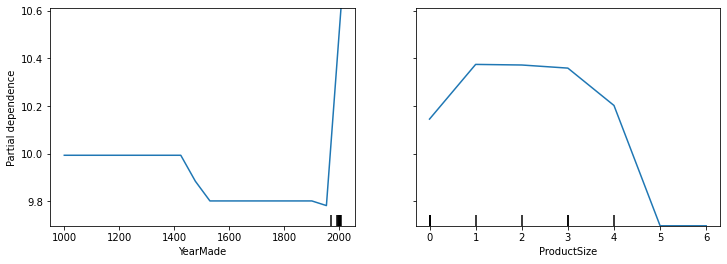

In [ ]:
# Es en esta seccion que podemos observar los graficos de dependencia parciales
# Para el caso de los años de fabricacion se puede observar una fuerte tendecia 
# a un alza de precios para los ultimos años. En cambio, para la variable de tamaños
# de productos, se observa una extraña tendencia a la baja en el precio, para 
# aquellos valores vacios en los datos (estos aparecen como #na#)
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

## **Tree Interpreter**

Lo que vamos a hacer en esta ocacion (similar a cuando calculamos el grado de importancia de las columnas) es:

 - Seleccionar un dato
 - Seleccionamos un arbol
 - Hacemos pasar este dato por el arbol
 - Luego, lo que vamos registrando son los aumentos o disminuciones de la prediccion, cuando vamos haciendo pasar este dato, por las distintas ramificaciones del arbol.

In [ ]:
# Ahora que ya tenemos identifica las columnas mas relevantes para le modelo
# lo que sigue es observar como estas se comportan
!pip install treeinterpreter
!pip install waterfallcharts

In [ ]:
# Vamos a importar estas dos bibliotecas para realizar este analisis
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [ ]:
# Aqui seleccionamos algunas filas del conjunto de validacion
row = valid_xs_final.iloc[:5]

In [ ]:
# Y aqui es donde se genera la interpretacion
# prediction: la prediccion del random forest 
# bias: mide el promedio de la variable dependiente
# contribution: Total de cambio que se produce al pasar los datos por las segmentaciones
# Nota: prediction = bias + contribution
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [ ]:
# Aqui podemos ver los resultados para una fila (en este caso la fila 0)
prediction[0], bias[0], contributions[0].sum()

(array([10.10545657]), 10.104180457970621, 0.0012761116144424933)

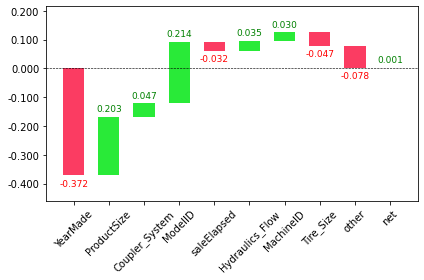

In [ ]:
# Para observar mas claramente estos resultados, es que utilizamos graficos de cascada.
# En los cuales se puede observar los incrementos en verde.
# Las reducciones en rojo.
# Y al final a la derecha, la resultante de la suma de todos estos.
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

# **Extrapolation and Neural Networks**

### **The Extrapolation Problem**

Esto hace referencia al problema que presentan algunos modelos cuando intentan extrapolar informacion. Para el caso del metodo del decision tree (por ende tambien para el random forest), estos no logran generar buenas predicciones para valores nunca antes vistos en el conjunto de entrenamiento. 

A continuacion se muestra un ejemplo sencillo, de como el metodo de random forest presenta problemas al predecir valores futuros (justamente porque estos valores solo se encuentran en el conjunto de validacion y no se utilizan para el entrenamiento del modelo)

In [ ]:
# Fijemos una semilla, para generar cada vez los mismo valores aleatorios
np.random.seed(42)

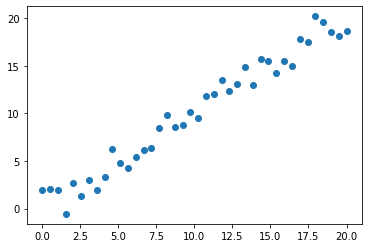

In [ ]:
# Vamos a generar un set de datos sencillo, con solo una variable independiente
# y = x + val_alea
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [ ]:
# Dado que el metodo de Random Forest solicita los datos de entrada en formato matricial
# en el eje x agregaremos una nueva dimension
xs_lin = x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [ ]:
# Esto es equivalente a hacer lo siguiente
x_lin[:,None].shape

torch.Size([40, 1])

In [ ]:
# Armamos el modelo
# Utilizamos los primeros 30 valores como parte del conjunto de entrenamiento
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

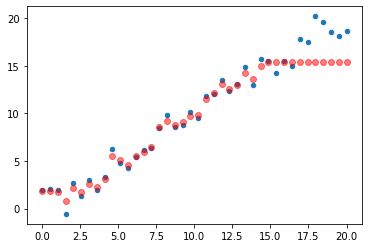

In [ ]:
# Los puntos azules corresponden a los valores originales
# Los puntos rojos son las predicciones del modelo
## Este ejercicio  es facil notar como a este modelo se le dificulta predecir 
## valores futuros
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

### **Finding Out-of-Domain Data**

Lo que vamos a hacer aqui es encontrar aquellas columnas que puedan hacer que nuestra segmentacion de datos entre training set y validation set se pueda haber visto comprometida (en estos casos se busca que no existan patrones para determinar si un valor pertenece al validation set)

Para ver que columnas puedan estar afectando a que la separacion entre training set y validation set no se encuentren uniformemente distribuidos, vamos a armar un random forest, pero el objetivo en esta ocacion es predecir si un dato pertenece o no al validation set.

In [ ]:
# Primero, vamos a juntar los dos set de datos (trian y validation)
df_dom = pd.concat([xs_final, valid_xs_final])
# Luego, etiquetamos los datos (1: pertenece - 0: no pertenece)
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

# Ahora armamos el modelo
m = rf(df_dom, is_valid)
# Ahora vamos a ver que grado de importancia tiene cada columna para 
# hacer las predicciones
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.860415
10,SalesID,0.100638
13,MachineID,0.031452
0,YearMade,0.002759
4,ModelID,0.001114
9,Enclosure,0.000746


In [ ]:
# Lo que vamos a hacer ahora es observar que pasaria con el modelo original
# si quitamos a algunas de las columnas mas sospechosas
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.232835
SalesID 0.231413
saleElapsed 0.235034
MachineID 0.231716


In [ ]:
# Para los casos de 'SalesID' Y 'MachineID' se observaron mejoras al quitarles
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

# Ahora si volvemos a cargar el modelo, quitando estas columnas podemos ver algunas
# mejoras
m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229269

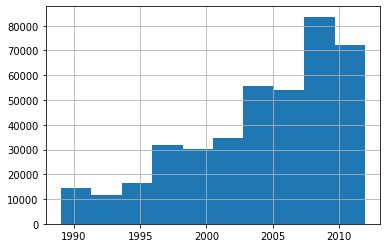

In [ ]:
# Lo otro que podriamos hacer es suponer que los valores mas actuales, nos ayudaran 
# mas en la prediccion que los valores antiguos. Asi, podemos probar nuevamente 
# a segmentar el conjunto de datos, pero esta vez en razon al tiempo.
xs['saleYear'].hist();

In [ ]:
# Por ejemplo, utilizamos solo los datos de venta luego del año 2004
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [ ]:
# Aqui observamos pequeñas mejoras en el modelo predictivo 
## Efectivamente datos mas nuevos, ayudan a predecir mejor datos futuros
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177539, 0.228884)

### **Using a Neural Network**

In [ ]:
# Aqui vamos a repetir varios de los pasos que hicimos cuando tratamos los datos
# para los modelos de decision tree y random forest
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [ ]:
# Aqui vamos a mantener las mismas columnas que obtuvimos del analisis con el 
# metodo de random forest
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [ ]:
# Aqui hacemos la separacion entre variables continuas y categoricas
## Continuas: > max_card
## Categoricas: <= max_card
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [ ]:
# Esta es la unica variable continua del modelo (tiene mas de 9000 datos distintos)
cont_nn

['saleElapsed']

In [ ]:
# En cambio, estas corresponderias a las variables categoricas del modelo
## Notar que la variable 'fiModelDesc' tiene muchas categorias
### Para el caso de 'ModelID' sucede lo mismo, pero se justifica por la gran cantidad
### de IDs
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
Hydraulics_Flow          3
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
ProductGroup             6
Hydraulics              12
Drive_System             4
Tire_Size               17
dtype: int64

In [ ]:
# Es tentativo sacar del modelo las variables que tengan una cardinalidad tan alta
## Recordemos que es estos casos los modelos de redes reuronales aplicaran un embedding
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)

# Volviendo a hacer un analisis con el metodo del RF, al quitar esta columna no 
# se pierde tanta eficiencia en el desempeño del modelo
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176946, 0.230317)

In [ ]:
# Asi que la sacamos
cat_nn.remove('fiModelDescriptor')

In [ ]:
# Ya en esta parte, cargamos los datos. Pero antes debemos sumar un nuevo
# procedimeiento a los datos (Normalize)
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [ ]:
# En particular para estos modelos, podemos utilizar batch size mas grandes
dls = to_nn.dataloaders(1024)

In [ ]:
# De igual forma, es recomendable ajustar la salida del modelo en base a algun rango
## Para esto, primero determinaremos cuales son los valores mas extremos en le 
## conjunto de validacion
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [ ]:
# Finalmente armamos el modelo de red neuronal
# (1024, 14) -> (1024, 500) -> (1024, 250) -> (1024, 1)
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00019054606673307717)

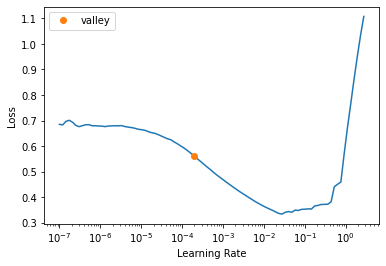

In [ ]:
# Utilizamos este metodo, para encontrar el LR que mejor se ajusta
learn.lr_find()

In [ ]:
# Ya por ultimo, realizamos el entrenamiento
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,time
0,0.039415,0.050656,00:08
1,0.039383,0.050870,00:08
2,0.039377,0.050946,00:08
3,0.039734,0.050883,00:08
4,0.039253,0.051805,00:08


In [ ]:
# Este fue el resultado del modelo de redes neuronales
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.227607

In [ ]:
# Esto es para guardar nuestro modelo
learn.save('nn')

Path('models/nn.pth')

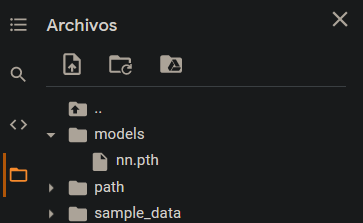

### **Ensembling**

Como vimos en esta clase, un random forest no es otra cosa que varios decision trees ensamblados. Asi, tambien pudimos constatar que el promedio de las predicciones de estos, generalmente, conseguian mejores resultados que trabajando por separado. 

Asimismo, no tenemos porque limitarnos a solo una familia de algortimos. Es por esta razon que a continuacion se muestra como armar un modelo predictivo que utiliza tanto las predicciones de un random forest como las predicciones de un modelo de redes neuronales.

In [ ]:
# para cada valor del conjunto de validacion, generamos las predicciones con 
# cada modelo y luego, decimos que la prediccion conjunta corresponde al promedio
# de estas
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [ ]:
r_mse(ens_preds,valid_y)

0.222469

# **Adicional**

## **Decision tree desde cero**

### **Preparativos**

Lo que voy a hacer aqui es generar un set de datos. Esta parte no es tan relevante asi que se puede saltar.

In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd


In [ ]:
# Funcion para generar los ruts
## Ojo que esta columna funciona como identificador (necesito valores unicos)
def gen_rut():
  rut = str(np.random.randint(10000000, 20000000)) + '-' + str(np.random.randint(0, 9))
  if rut[-1] == '0':
    rut = rut[:-1] + 'k'
  return rut

Ruts = [gen_rut() for i in range(10)]
Ruts

['13743712-3',
 '13566001-8',
 '14330435-3',
 '13714624-2',
 '11973691-6',
 '11554757-6',
 '18777450-6',
 '13997872-2',
 '12904776-1',
 '12736794-2']

In [ ]:
# Funcion para generar los nombres
def gen_nombre():
  lista_nombres = ['Roberto', 'Maria', 'Jose', 'Ignacio', 'Catalina', 
                   'Macarena', 'Andres', 'Andrea', 'Sofia', 'Felipe',
                   'Consuelo', 'Josefina', 'Rodrigo', 'Jorge', 'Cristobal']
  return np.random.choice(lista_nombres)

Nombres = [gen_nombre() for i in range(10)]
Nombres

['Ignacio',
 'Ignacio',
 'Sofia',
 'Rodrigo',
 'Roberto',
 'Felipe',
 'Andrea',
 'Andrea',
 'Jorge',
 'Maria']

In [ ]:
# Funcion para generar los apellidos
def gen_apellido():
  lista_apellidos = ['Arancibia', 'Flores', 'Alliende', 'Carvallo', 'Soto', 
                   'Riquelme', 'Perez', 'Retamales', 'Jimenez', 'Montaña',
                   'Araya', 'Echave', 'Green', 'Concha', 'Buschmann']
  return np.random.choice(lista_apellidos)


In [ ]:
# Esto que estoy haciendo ahora es generar un metodo con el cual asegurar la 
# unicidad en los datos de una columna (esto pensando en los ruts)

## Lo que se esta haciendo es separar el lista original en el elemento que
## estoy mirando y el resto de los elementos. Luego si el elemento que estoy
## mirando se encuentra contenido en el otro grupo, entonces podemos decir que 
## existe un valor duplicado. En consecuencia, debemos generamos un valor aleatorio
## hasta que se deje de presentar esta situacion

lista = [1, 2, 3, 4, 1, 1, 1]
for i in range(len(lista)):
  copia = lista.copy() 
  gen = copia.pop(i)
  print('valor: ', lista[i], ' y lista generada: ', copia)
  if lista[i] in copia:
    valor = lista[i]
    while valor in copia:
      valor = np.random.randint(0, 9)
      print(valor)
    lista.pop(i)
    lista.append(valor)
      
    

valor:  1  y lista generada:  [2, 3, 4, 1, 1, 1]
4
6
valor:  3  y lista generada:  [2, 4, 1, 1, 1, 6]
valor:  4  y lista generada:  [2, 3, 1, 1, 1, 6]
valor:  1  y lista generada:  [2, 3, 4, 1, 1, 6]
4
3
4
5
valor:  1  y lista generada:  [2, 3, 4, 1, 6, 5]
1
8
valor:  5  y lista generada:  [2, 3, 4, 1, 6, 8]
valor:  8  y lista generada:  [2, 3, 4, 1, 6, 5]


In [ ]:
# Funcion para quitar los duplicados
def del_duplicados(lista, metodo):
  for i in range(len(lista)):
    copia = lista.copy() 
    gen = copia.pop(i)    
    if lista[i] in copia:
      valor = lista[i]
      while valor in copia:
        valor = metodo()
      lista.pop(i)
      lista.append(valor)
  return lista

lista = [1, 2, 3, 4, 1, 1, 1]
def metodo():
  return np.random.randint(0, 9)

lista_nueva = del_duplicados(lista, metodo)
print(lista_nueva)


[2, 3, 4, 1, 0, 5, 6]


In [ ]:
# probemos ahora para el caso de los ruts
filas = 10000
lista = [gen_rut() for i in range(filas)]
conjunto = set(lista)
print(len(lista), len(conjunto))

10000 10000


In [ ]:
# En el codigo anterior podemos ver que existe al menos 1 valor duplicado
# Por lo que voy a usar el metodo que creamos recien para corregirlo
nueva_lista = del_duplicados(lista, gen_rut)
conjunto_nuevo = set(nueva_lista)
print(len(nueva_lista), len(conjunto_nuevo))

10000 10000


In [ ]:
# funcion para generar la edad
def edad():
  return np.random.randint(19, 24)

In [ ]:
# Funcion para los cursos aprobados
def cursos_aprob():
  return np.random.randint(10, 30)

In [ ]:
# Funcion para los cursos reprobados
def cursos_reprob(cursos_aprobados, total_cursos):
  return total_cursos-cursos_aprobados

In [ ]:
# Funcion para el promedio global academico (PGA)
def PGA(curs_aprob, curs_repr):
  prom_aprob = np.random.normal(5, 0.6)*curs_aprob
  prom_repr = np.random.normal(3, 0.8)*curs_repr
  return round((prom_aprob+prom_repr)/(curs_aprob+curs_repr), 2)

In [ ]:
# Funcion para el promedio actual
# Esta la voy a modificar para que este altamente correlacionada con el PGA
def prom_act(PGA):
  return round(PGA + np.random.random(), 2)

In [ ]:
# primero vamos a crear un set de datos de entrada
## Voy a simular el ejercicio de intentar predecir las notas que obtentria un alumno
## en base a su situacion academica y datos personales

### Estructura de los datos
### Rut | Nombre | apellido | edad | PGA | Cursos Aprobados | Cursos Reprobados | Promedio Curso Actual

N_Filas = 1000
Total_cursos = 30

Ruts = [gen_rut() for i in range(N_Filas)]
Ruts = del_duplicados(Ruts, gen_rut)

Nombres = [gen_nombre() for i in range(N_Filas)]

Apellidos = [gen_apellido() for i in range(N_Filas)]

Edades = [edad() for i in range(N_Filas)]

Cursos_Aprobados = [cursos_aprob() for i in range(N_Filas)]

Cursos_Reprobados = [cursos_reprob(Cursos_Aprobados[i], Total_cursos) for i in range(N_Filas)]

PGAs = [PGA(Cursos_Aprobados[i], Cursos_Reprobados[i]) for i in range(N_Filas)]

Promedio_Curso_Actual = [prom_act(PGAs[i]) for i in range(N_Filas)]


In [ ]:
dic = {'Ruts':Ruts,
       'Nombres':Nombres, 
       'Apellidos':Apellidos,
       'Edades':Edades,
       'Cursos_Aprobados':Cursos_Aprobados,
       'Cursos_Reprobados':Cursos_Reprobados,
       'PGAs':PGAs,
       'Promedio_Curso_Actual':Promedio_Curso_Actual}

df = pd.DataFrame(dic)
df.head()


,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs,Promedio_Curso_Actual
0,18928752-6,Maria,Carvallo,19,10,20,3.11,3.20
1,17253143-2,Roberto,Alliende,22,12,18,3.26,3.30
2,15043141-3,Maria,Concha,19,26,4,4.84,4.92
3,13607437-3,Consuelo,Buschmann,23,29,1,4.64,5.44
4,18588984-7,Josefina,Perez,19,15,15,3.89,3.92


In [ ]:
# Lo primero que voy a tener que hacer es pasar las variables categoricas a numero
def cat_to_cont(df):
  df_new = df.copy()
  columnas = df.columns
  
  # identificar las columnas categorias
  cat_columns = []
  for i in columnas:
    if type(df[i][1]) == str or type(df[i][1]) == np.str_:
      cat_columns.append(i)
  
  # por cada columna voy a ir mirando sus valores unicos
  for i in cat_columns:
    lista = df[i].unique()
    cant_categorias = len(lista)
    dic = {lista[i]:i for i in range(cant_categorias)} 
    #print(dic)
    for row in range(len(df[i])):
      valor = str(df[i][row])     
      df_new[i][row] = dic[valor]

  return df_new
  
df1 = cat_to_cont(df)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs,Promedio_Curso_Actual
0,0,0,0,19,10,20,3.11,3.20
1,1,1,1,22,12,18,3.26,3.30
2,2,0,2,19,26,4,4.84,4.92
3,3,2,3,23,29,1,4.64,5.44
4,4,3,4,19,15,15,3.89,3.92


In [ ]:
# voy a aplicarle log a la columna 'Promedio_Curso_Actual'
df_log = np.log(df1['Promedio_Curso_Actual'])
df1 = df1.drop(columns=['Promedio_Curso_Actual'])
df1['Promedio_Curso_Actual'] = df_log
df1

,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs,Promedio_Curso_Actual
0,0,0,0,19,10,20,3.11,1.163151
1,1,1,1,22,12,18,3.26,1.193922
2,2,0,2,19,26,4,4.84,1.593309
3,3,2,3,23,29,1,4.64,1.693779
4,4,3,4,19,15,15,3.89,1.366092
...,...,...,...,...,...,...,...,...
995,995,7,8,23,25,5,4.95,1.728109
996,996,11,12,23,17,13,4.37,1.556037
997,997,7,5,22,19,11,4.90,1.750937
998,998,8,10,21,14,16,3.52,1.358409


### **Construyendo el algoritmo**

**Nota**: En el desarrollo del algoritmo calcule el error para la particion de una forma distinta, pero equivalente a la que se especifica en la clase.

Esta es la manera que especifica la clase (imaginemos 10 datos), siendo:

- $i = (1, ..., 10)$
- $y_{i}$: valor de la variable dependiente i
- $y'_{i}$: prediccion sobre la variable dependiente i

\begin{equation}
Error = \sum_{i=1}^{10} (y_{i}-y_{i}')^2 
\end{equation}

Ahora, imaginemos que distinguimos por grupos, entonces tenemos los primeros 7 datos pertenecientes al grupo 1 y los 3 restantes al grupo 2.

- $grupo1 = (1, ...,7)$
- $grupo2 = (8, ...,10)$
- $y_{i}^{1}$: valor de la variable dependiente $i \in grupo1$
- $y_{i}^{2}$: valor de la variable dependiente $i \in grupo2$
- $y_{i}^{'1}$: prediccion sobre la variable dependiente $i \in grupo1$
- $y_{i}^{'2}$: prediccion sobre la variable dependiente $i \in grupo2$

Luego el error lo podemos escribir asi:

\begin{equation}
Error = \frac{1}{10}(\sum_{i=1}^{7} (y_{i}^{1}-y_{i}^{'1})^2 + \sum_{i=8}^{10} (y_{i}^{2}-y_{i}^{'2})^2)
\end{equation}

\begin{equation}
Error = \frac{1}{10}(7\frac{\sum_{i=1}^{7} (y_{i}^{1}-y_{i}^{'1})^2}{7} + 3\frac{\sum_{i=8}^{10} (y_{i}^{2}-y_{i}^{'2})^2}{3})
\end{equation}

\begin{equation}
Error = \frac{7}{10}MSE(grupo1) + \frac{3}{10}MSE(grupo2)
\end{equation}


 



In [ ]:
# cosas que va necesitar el algoritmo antes (esto lo voy a hacer mas abajo)
# tener identificado las variables categoricas y las variables continuas
# tener identificado la variable depediente
# definir la metrica (MSE por ahora, pero si la variable dependiente fuera categorica podriamos utilizar softmax)
# definir uno o mas criterios de termino (cantidad de nodos al final)

# prediccion
def pred(grupo):
  return np.mean(grupo)

# definimos la metrica
def MSE(pred, y):
  return ((y-pred)**2).mean()

In [ ]:
# Vamos a ir por pasos

y = df1['Promedio_Curso_Actual']

## Iteracion1
pred1 = pred(y)
error = MSE(pred1, y)
print(pred1)
print(error)

1.2794200144132075
0.2536718099635906


In [ ]:
## Iteracion2
# Primero tengo que recorrer todas las columnas del df
dic = []
for i in df1.columns[:-1]:
  # obtenemos las categorias
  categorias = np.sort(df1[i].unique())
  limite = 0

  for cat in categorias[:-1]:
    error_cat = 1000000

    # separamos en dos grupos 
    cond = (df1[i]<=cat)
    grupo1 = np.where(cond)[0]
    grupo2 = np.where(~cond)[0]

    # hacemos las predicciones
    pred1 = np.mean(df1['Promedio_Curso_Actual'][grupo1])
    pred2 = np.mean(df1['Promedio_Curso_Actual'][grupo2])

    # calculamos el error
    error1 = MSE(pred1, df1['Promedio_Curso_Actual'])
    error2 = MSE(pred2, df1['Promedio_Curso_Actual'])

    if error1 < error_cat or error2 < error_cat:
      limite = cat

    error_cat = np.min([error1, error2, error_cat])

  dic.append([i, cat, error_cat])

for i in dic:
  print(i)

['Ruts', 998, 0.25367271449266593]
['Nombres', 13, 0.25368734480955973]
['Apellidos', 13, 0.253676689557716]
['Edades', 22, 0.2536832751777358]
['Cursos_Aprobados', 28, 0.25367181363801333]
['Cursos_Reprobados', 19, 0.2536956980010114]
['PGAs', 6.37, 0.25367190614130214]


In [ ]:
# esto es para sacar el min
res = np.array([i[2] for i in dic])
ind_min = np.argmin(res)
dic[ind_min]

# Asi la primera separacion la tengo que hacer mirando la columna reprobados
# y haciendo la segmentacion en menores o iguales a 19

['Cursos_Aprobados', 28, 0.25367181363801333]

In [ ]:
# Bien, ahora todo este proceso hagamoslo una funcion
def step(df, var_dep):
  df1 = df.copy()
  dic = []
  for i in df1.columns[:-1]:
    categorias = np.sort(df1[i].unique())
    limite = 0
    cat_actual = ''
    error_cat = 1000000
    for cat in categorias[:-1]:
      cat_actual = cat
      cond = (df1[i]<=cat)
      grupo1 = np.where(cond)[0]
      grupo2 = np.where(~cond)[0]
      pred1 = np.mean(df1[var_dep][grupo1])
      pred2 = np.mean(df1[var_dep][grupo2])
      cant1 = len(df1[var_dep][grupo1])
      cant2 = len(df1[var_dep][grupo2])
      cant_total = cant1 + cant2
      error1 = MSE(pred1, df1[var_dep])
      error2 = MSE(pred2, df1[var_dep])
      error_prom_pond = error1*(cant1/cant_total) + error2*(cant2/cant_total) 
      if error_prom_pond < error_cat:
        limite = cat_actual
      error_cat = np.min([error_prom_pond, error_cat])
    dic.append([i, cat_actual, error_cat])
  res = np.array([i[2] for i in dic])
  #print(dic)
  if len(res) == 0:
    return False
  else:
    ind_min = np.argmin(res)
    return dic[ind_min]


In [ ]:
dep_var = 'Promedio_Curso_Actual'
salida = step(df1, dep_var)
salida

['Ruts', 998, 0.2536718099805165]

In [ ]:
# Lo que tendria que hacer ahora es segmentar por la condicion de limite
# y aplicarles la funcion de step a estos nuevos grupos
## Ojo: Tambien tenemos que definir la condicion de termino

# Iteracion3
con_ter = 5 # cantidad de nodos al final del arbol
columna_anterior, limite, error1 = salida[0], salida[1], salida[2]
columnas_restantes = list(df1.columns)

# ahora estas van a ser las columnas con las que voy a trabajar
columnas_restantes.remove(columna_anterior)

# Vamos a restructurar el df en dos nuevos, segun la cond limite
df2 = df1.copy()
cond = (df2[columna_anterior] <= limite)
group1 = np.where(cond)[0]
group2 = np.where(~cond)[0]

df_new_1 = df2.filter(items=group1, axis=0)
df_new_2 = df2.filter(items=group2, axis=0)

df_new_1 = df_new_1[columnas_restantes]
df_new_2 = df_new_2[columnas_restantes]

df_new_1 = df_new_1.reset_index(drop=True)
df_new_2 = df_new_2.reset_index(drop=True)

print(len(df_new_1))
print(len(df_new_2))


999
1


In [ ]:
salida2 = step(df_new_1, dep_var)
print(salida2)


['Cursos_Aprobados', 28, 0.2530212098085104]


In [ ]:
salida3 = step(df_new_2, dep_var)
print(salida3)


['Nombres', '', 1000000]


In [ ]:
# Iteracion4
# Solo continuo con la salida2
columna_anterior, limite, error1 = salida2[0], salida2[1], salida2[2]
columnas_restantes = list(df_new_1.columns)

# ahora estas van a ser las columnas con las que voy a trabajar
columnas_restantes.remove(columna_anterior)

# Vamos a restructurar el df en dos nuevos, segun la cond limite
df2 = df_new_1.copy()
cond = (df2[columna_anterior] <= limite)
group1 = np.where(cond)[0]
group2 = np.where(~cond)[0]

df_new_1 = df2.filter(items=group1, axis=0)
df_new_2 = df2.filter(items=group2, axis=0)

df_new_1 = df_new_1[columnas_restantes]
df_new_2 = df_new_2[columnas_restantes]

df_new_1 = df_new_1.reset_index(drop=True)
df_new_2 = df_new_2.reset_index(drop=True)

print(len(df_new_1))
print(len(df_new_2))


951
48


In [ ]:
salida4 = step(df_new_1, dep_var)
print(salida4)


['Nombres', 13, 0.251244958428924]


In [ ]:
salida5 = step(df_new_2, dep_var)
print(salida5)

['PGAs', 5.92, 0.28821327506872974]


Bien, ahora voy a intentar resumir todo esto.


In [ ]:
class decision_tree():
  def __init__(self, df, dep_var):
    self.df = df
    self.dep_var = dep_var

  # prediccion
  def pred(self, grupo):
    return np.mean(grupo)

  # metrica
  def MSE(self, pred, y):
    return ((y-pred)**2).mean()
    
  # Paso
  def step(self, df):    
    df1 = df.copy()
    dic = []
    for i in df1.columns[:-1]:
      categorias = np.sort(df1[i].unique())
      limite = 0
      cat_actual = ''
      error_cat = 1000000
      for cat in categorias[:-1]:
        cat_actual = cat
        cond = (df1[i]<=cat)
        grupo1 = np.where(cond)[0]
        grupo2 = np.where(~cond)[0]
        pred1 = np.mean(df1[self.dep_var][grupo1])
        pred2 = np.mean(df1[self.dep_var][grupo2])
        cant1 = len(df1[self.dep_var][grupo1])
        cant2 = len(df1[self.dep_var][grupo2])
        cant_total = cant1 + cant2
        error1 = self.MSE(pred1, df1[self.dep_var])
        error2 = self.MSE(pred2, df1[self.dep_var])
        error_prom_pond = error1*(cant1/cant_total) + error2*(cant2/cant_total) 
        if error_prom_pond < error_cat:
          limite = cat_actual
        error_cat = np.min([error_prom_pond, error_cat])
      dic.append([i, cat_actual, error_cat, error1, error2])
    res = np.array([i[2] for i in dic])
    
    if len(res) == 0:
      return False
    else:
      ind_min = np.argmin(res)
      return dic[ind_min]

  # Recorrido
  def train(self, total_nodos):
    self.total_nodos = total_nodos
    nodo_actual = 0
    self.historial = []
    # Para ir haciendo los recoridos pienso que lo que se podria hacer es
    # utilizar la siguiente estructura 
    # [nodo_actual| error | cond | nodo_anterior | df_actual]
          
    # Primera iteracion
    y = self.df[self.dep_var]
    df_copia = self.df.copy()
    pred_ = self.pred(y)
    error = np.mean(self.MSE(pred_, y))
    nodo_actual += 1
    self.historial.append([[nodo_actual, error, '', '', df_copia]])

    # Desde la segunda iteracion en adelante
    while nodo_actual < total_nodos+1:
      # generamos un nuevo nivel
      nuevo_nivel = []
      for nodo in self.historial[-1]:
        # ejecutamos un paso
        df = nodo[-1]
        salida = self.step(df)
        columna_anterior, limite, error1, error2 = salida[0], salida[1], salida[3], salida[4]
        
        # Actualizamos el DataFrame resultante            
        columnas_restantes = list(df.columns)        
        columnas_restantes.remove(columna_anterior)

        # Vamos a restructurar el df en dos nuevos, segun la cond limite
        df2 = df.copy()
        cond = (df2[columna_anterior] <= limite)
        group1 = np.where(cond)[0]
        group2 = np.where(~cond)[0]
        df_new_1 = df2.filter(items=group1, axis=0)
        df_new_2 = df2.filter(items=group2, axis=0)
        df_new_1 = df_new_1[columnas_restantes]
        df_new_2 = df_new_2[columnas_restantes]
        df_new_1 = df_new_1.reset_index(drop=True)
        df_new_2 = df_new_2.reset_index(drop=True)

        # guardamos los nuevos nodos
        nodo_anterior = nodo_actual
        nuevo_nivel.append([2*nodo_anterior, error1, f'{columna_anterior} <= {limite}', nodo_anterior, df_new_1])
        nuevo_nivel.append([2*nodo_anterior+1, error2, f'{columna_anterior} > {limite}', nodo_anterior, df_new_1])
        nodo_actual += 1
        

      self.historial.append(nuevo_nivel)

    return self.historial

In [ ]:
dep_var = 'Promedio_Curso_Actual'
arbol = decision_tree(df1, dep_var)
recorrido = arbol.train(8)

In [ ]:
# Nivel 0
recorrido[0][0][:4]

[1, 0.2599531134939618, '', '']

In [ ]:
# Nivel 1
print(recorrido[1][0][0:4])
print(recorrido[1][1][0:4])


[2, 0.2599531145883376, 'Ruts <= 998', 1]
[3, 0.26104530186214614, 'Ruts > 998', 1]


In [ ]:
# Nivel 2
print(recorrido[2][0][0:4])
print(recorrido[2][1][0:4])
print(recorrido[2][2][0:4])
print(recorrido[2][3][0:4])


[4, 0.26024322693571367, 'Apellidos <= 13', 2]
[5, 0.26640607161802715, 'Apellidos > 13', 2]
[6, 0.26024322693571367, 'Apellidos <= 13', 3]
[7, 0.26640607161802715, 'Apellidos > 13', 3]


In [ ]:
# Nivel 3
print(recorrido[3][0][0:4])
print(recorrido[3][1][0:4])
print(recorrido[3][2][0:4])
print(recorrido[3][3][0:4])
print(recorrido[3][4][0:4])
print(recorrido[3][5][0:4])
print(recorrido[3][6][0:4])
print(recorrido[3][7][0:4])


[8, 0.2585133672475373, 'Cursos_Aprobados <= 28', 4]
[9, 0.2818303126791816, 'Cursos_Aprobados > 28', 4]
[10, 0.2585133672475373, 'Cursos_Aprobados <= 28', 5]
[11, 0.2818303126791816, 'Cursos_Aprobados > 28', 5]
[12, 0.2585133672475373, 'Cursos_Aprobados <= 28', 6]
[13, 0.2818303126791816, 'Cursos_Aprobados > 28', 6]
[14, 0.2585133672475373, 'Cursos_Aprobados <= 28', 7]
[15, 0.2818303126791816, 'Cursos_Aprobados > 28', 7]


In [ ]:
# hasta este punto estamos super bien, lo unico que nos esta faltando, antes de
# de pasar al random forest es:
# 1) limpiar los df del arbol (para que no haya tanto dato dando vuelta)
# 2) generar la prediccion para un nuevo dato

# 1) limpiar los dfs
dic = {}
for i, nivel in enumerate(recorrido):
  dic[i] = []
  for nodo in nivel:
    nodo = nodo[:4]
    dic[i].append(nodo)
    print(nodo)

print(dic)


[1, 0.2395343119254756, '', '']
[2, 0.23953473810874812, 'PGAs <= 6.36', 1]
[3, 0.6648656437041293, 'PGAs > 6.36', 1]
[4, 0.23934795632756942, 'Ruts <= 998', 2]
[5, 0.29272198650241094, 'Ruts > 998', 2]
[6, 0.23934795632756942, 'Ruts <= 998', 3]
[7, 0.29272198650241094, 'Ruts > 998', 3]
[8, 0.23953713132308643, 'Apellidos <= 13', 4]
[9, 0.24025167421945398, 'Apellidos > 13', 4]
[10, 0.23953713132308643, 'Apellidos <= 13', 5]
[11, 0.24025167421945398, 'Apellidos > 13', 5]
[12, 0.23953713132308643, 'Apellidos <= 13', 6]
[13, 0.24025167421945398, 'Apellidos > 13', 6]
[14, 0.23953713132308643, 'Apellidos <= 13', 7]
[15, 0.24025167421945398, 'Apellidos > 13', 7]
[16, 0.24095111059394303, 'Cursos_Aprobados <= 28', 8]
[17, 0.24816472601553394, 'Cursos_Aprobados > 28', 8]
[18, 0.24095111059394303, 'Cursos_Aprobados <= 28', 9]
[19, 0.24816472601553394, 'Cursos_Aprobados > 28', 9]
[20, 0.24095111059394303, 'Cursos_Aprobados <= 28', 10]
[21, 0.24816472601553394, 'Cursos_Aprobados > 28', 10]
[22, 

In [ ]:
# 2) para generar la prediccion
## partamos con un dato de prueba
dato_prueba = df1.iloc[[10]]
y_real = float(dato_prueba['Promedio_Curso_Actual'])  # esto lo voy a guardar para ver que tan cerca predice
print(y_real)
dato_prueba = dato_prueba.drop(columns=['Promedio_Curso_Actual'])
dato_prueba


0.23901690047049992


,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs
10,10,8,2,20,15,15,3.76


In [ ]:
# Hagamos una cosa, podemos sacar las rutas posibles (igual al numero de nodos en el ultimo nivel)
# por ejemplo una ruta podria ser
ultimo_nivel = dic[4]
# voy a generar una de estas rutas
# estructura (nodos | condiciones)
# partamos del primer nodo del ultimo nivel
ruta1 = [[], []]
nodo_1_final = dic[4][0]
ruta1[0].append(dic[4][0][0])
ruta1[1].append(dic[4][0][2])
nodo_anterior = dic[4][0][3]
print(ruta1)
# ahora tengo que ir al nivel 3 y buscar el nodo_anterior
nivel = dic[3]
for nodo in nivel:
  if nodo[0] == nodo_anterior:
    ruta1[0].append(nodo_anterior)
    ruta1[1].append(nodo[2])
    nodo_anterior = nodo[3]    
print(ruta1)
# la misma historia, ahora en el nivel 2
nivel = dic[2]
for nodo in nivel:
  if nodo[0] == nodo_anterior:
    ruta1[0].append(nodo_anterior)
    ruta1[1].append(nodo[2])
    nodo_anterior = nodo[3]
print(ruta1)
# la misma historia, ahora en el nivel 2
nivel = dic[1]
for nodo in nivel:
  if nodo[0] == nodo_anterior:
    ruta1[0].append(nodo_anterior)
    ruta1[1].append(nodo[2])
    nodo_anterior = nodo[3]
print(ruta1)



[[16], ['Cursos_Aprobados <= 28']]
[[16, 8], ['Cursos_Aprobados <= 28', 'Apellidos <= 13']]
[[16, 8, 4], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998']]
[[16, 8, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36']]


In [ ]:
# ahora ordenemos un poco esto
rutas = []
cant_niveles = len(dic)-1
for i in range(len(dic[cant_niveles])):
  ruta = [[], [], []]
  nivel = cant_niveles
  
  # primer iteracion
  ruta[0].append(dic[nivel][i][0])
  ruta[1].append(dic[nivel][i][2])
  ruta[2].append(dic[nivel][i][1])  # esto es para agregar el error final a las rutas
  nodo_anterior = dic[nivel][i][3]

  # ahora tengo que retroceder
  num_nivel = cant_niveles
  while num_nivel != 0:
    nivel = dic[num_nivel]
    for nodo in nivel:
      if nodo[0] == nodo_anterior:
        ruta[0].append(nodo_anterior)
        ruta[1].append(nodo[2])
        nodo_anterior = nodo[3]
    num_nivel -= 1

  rutas.append(ruta)


In [ ]:
for i in rutas:
  print(i)

[[16, 8, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[17, 8, 4, 2], ['Cursos_Aprobados > 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24816472601553394]]
[[18, 9, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[19, 9, 4, 2], ['Cursos_Aprobados > 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24816472601553394]]
[[20, 10, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[21, 10, 5, 2], ['Cursos_Aprobados > 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24816472601553394]]
[[22, 11, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[23, 11, 5, 2], ['Cursos_Aprobados > 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24816472601553394]]
[[24, 12, 6, 3], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 

In [ ]:
# Hagamos una cosa, ahora que tengo todas las rutas, tengo que ver (por cada una 
# de estas), cual calza con la info del dato

# partamos con la primera cond
posibilidades = rutas.copy()

# ahora vamos a descartar (ruta, cats, cat)
cat = posibilidades[0][1][0].split()[0]
limite = posibilidades[0][1][0].split()[2]
val_dato = list(dato_prueba[cat])[0]
cond_man = ''
if val_dato <= float(limite):
  cond_man = f'{cat} <= {limite}'
else:
  cond_man = f'{cat} > {limite}'
print(cond_man)

# ahora elimino de las posibilidades todas aquellas opciones que no cumplan esta condicion
se_mantienen = []
for i in posibilidades:
  if i[1][0] == cond_man:
    se_mantienen.append(i)
for i in se_mantienen:
  print(i)

Cursos_Aprobados <= 28
[[16, 8, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[18, 9, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[20, 10, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[22, 11, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303]]
[[24, 12, 6, 3], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs > 6.36'], [0.24095111059394303]]
[[26, 13, 6, 3], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs > 6.36'], [0.24095111059394303]]
[[28, 14, 7, 3], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs > 6.36'], [0.24095111059394303]]
[[30, 15, 7, 3], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs > 6.36'], [0.24095111059394303]]


In [ ]:
# bien, esto mismo lo voy a hacer ahora, un poco mas ordenado
rutas1 = rutas.copy()
posibilidades = rutas1

for i in posibilidades:
  i.append([])

for categ in range(4):
  cat = posibilidades[0][1][categ].split()[0]  
  
  for ruta in range(16):
    limite = posibilidades[ruta][1][categ].split()[2]
    val_dato = list(dato_prueba[cat])[0]
    cond_man = ''
    if val_dato <= float(limite):
      cond_man = f'{cat} <= {limite}'
    else:
      cond_man = f'{cat} > {limite}'   
  
    if posibilidades[ruta][1][categ] == cond_man:
      posibilidades[ruta][3].append(1)

for i in rutas:
  print(i) 


[[16, 8, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303], [1, 1, 1, 1]]
[[17, 8, 4, 2], ['Cursos_Aprobados > 28', 'Apellidos <= 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24816472601553394], [1, 1, 1]]
[[18, 9, 4, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24095111059394303], [1, 1, 1]]
[[19, 9, 4, 2], ['Cursos_Aprobados > 28', 'Apellidos > 13', 'Ruts <= 998', 'PGAs <= 6.36'], [0.24816472601553394], [1, 1]]
[[20, 10, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303], [1, 1, 1]]
[[21, 10, 5, 2], ['Cursos_Aprobados > 28', 'Apellidos <= 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24816472601553394], [1, 1]]
[[22, 11, 5, 2], ['Cursos_Aprobados <= 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24095111059394303], [1, 1]]
[[23, 11, 5, 2], ['Cursos_Aprobados > 28', 'Apellidos > 13', 'Ruts > 998', 'PGAs <= 6.36'], [0.24816472601553394], [

In [ ]:
df1.head()

,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs,Promedio_Curso_Actual
0,0,0,0,20,15,15,4.07,1.611436
1,1,1,1,21,20,10,4.47,1.050822
2,2,2,2,22,26,4,4.54,0.512824
3,3,0,3,20,13,17,3.73,0.760806
4,4,3,4,20,21,9,4.23,1.383791


In [ ]:
# por ultimo, el que tenga mas 1 en las filas (o tenga una suma igual al numero de categorias)
# es la fila correcta
for i in posibilidades:
  if np.sum(i[3]) == 4:
    cond_segm = i[1]
    print(f'error: {i[2]}')

# ahora que tengo las condiciones de segmentacion, voy a volver al df inicial
# y a empezar a segmentar
df_predict = df1.copy()
for cat in cond_segm:
  cat = cat.split()
  categ, indc, limite = cat[0], cat[1], float(cat[2])
  if indc == '<=':    
    cond = (df_predict[categ] <= limite)
    group = np.where(cond)[0]
    df_predict = df_predict.filter(items=group, axis=0)
  elif indc == '>':
    cond = (df_predict[categ] > limite)
    group = np.where(cond)[0]
    df_predict = df_predict.filter(items=group, axis=0)

y_predict = np.mean(list(df_predict[dep_var]))
y_predict

error: [0.24095111059394303]


1.2914035551589467

### **Algoritmo Completo** 


In [ ]:
class decision_tree():
  def __init__(self, df, dep_var):
    self.df = df
    self.dep_var = dep_var
    self.dic = []
    self.dic1 = {}
    # necesario para el random forest
    self.historial = []
    # ----------

  # prediccion
  def pred(self, grupo):
    return np.mean(grupo)

  # metrica
  def MSE(self, pred, y):
    return ((y-pred)**2).mean()
    
  # Paso
  def step(self, df):    
    self.df1 = df.copy()
    self.dic = []
    for i in self.df1.columns[:-1]:
      categorias = np.sort(self.df1[i].unique())
      limite = 0
      cat_actual = ''
      # -------------
      error1 = 0
      error2 = 0
      # -------------
      error_cat = 1000000
      for cat in categorias[:-1]:
        cat_actual = cat
        cond = (self.df1[i]<=cat)
        grupo1 = np.where(cond)[0]
        grupo2 = np.where(~cond)[0]
        pred1 = np.mean(self.df1[self.dep_var][grupo1])
        pred2 = np.mean(self.df1[self.dep_var][grupo2])
        cant1 = len(self.df1[self.dep_var][grupo1])
        cant2 = len(self.df1[self.dep_var][grupo2])
        cant_total = cant1 + cant2
        error1 = self.MSE(pred1, self.df1[self.dep_var])
        error2 = self.MSE(pred2, self.df1[self.dep_var])
        error_prom_pond = error1*(cant1/cant_total) + error2*(cant2/cant_total) 
        if error_prom_pond < error_cat:
          limite = cat_actual
        error_cat = np.min([error_prom_pond, error_cat])
      self.dic.append([i, cat_actual, error_cat, error1, error2])
    res = np.array([i[2] for i in self.dic])
    
    if len(res) == 0:
      return False
    else:
      ind_min = np.argmin(res)
      return self.dic[ind_min]

  def train(self, total_nodos):
    self.total_nodos = total_nodos
    nodo_actual = 0
    # --------------
    nodo_final = 0
    # --------------
    self.historial = []
    
    y = self.df[self.dep_var]
    df_copia = self.df.copy()
    pred_ = self.pred(y)
    error = np.mean(self.MSE(pred_, y))
    nodo_actual += 1
    # ---------------
    nodo_final += 1
    # ---------------
    self.historial.append([[nodo_actual, error, '', '', df_copia]])

    while nodo_final < total_nodos-1: # SE CAMBIO nodo_actual por nodo_final
      nuevo_nivel = []
      for nodo in self.historial[-1]:
        df = nodo[-1]
        salida = self.step(df)
        columna_anterior, limite, error11, error22 = salida[0], str(salida[1]), salida[3], salida[4]
        # ----Este error lo encontre despues---
        if '.' in limite:
          limite = float(limite)
        elif limite == '':
          limite = 100000
        else:
          limite = int(limite)          
        # --------------------------------------        
        columnas_restantes = list(df.columns)        
        columnas_restantes.remove(columna_anterior)
        
        df2 = df.copy()
        cond = (df2[columna_anterior] <= limite)
        group1 = np.where(cond)[0]
        group2 = np.where(~cond)[0]
        df_new_1 = df2.filter(items=group1, axis=0)
        df_new_2 = df2.filter(items=group2, axis=0)
        df_new_1 = df_new_1[columnas_restantes]
        df_new_2 = df_new_2[columnas_restantes]
        df_new_1 = df_new_1.reset_index(drop=True)
        df_new_2 = df_new_2.reset_index(drop=True)

        nodo_anterior = nodo_actual
        # ----- esto es para registrar solo los nodos que interesan
        if limite != 100000:
          nuevo_nivel.append([2*nodo_anterior, error11, f'{columna_anterior} <= {limite}', nodo_anterior, df_new_1])
          nuevo_nivel.append([2*nodo_anterior+1, error22, f'{columna_anterior} > {limite}', nodo_anterior, df_new_2])
        # ---
        nodo_actual += 1
        # ---------------
        nodo_final += 2        
        # ---------------
      self.historial.append(nuevo_nivel)

    return self.historial


  def prediccion(self, dato_prueba):
    self.dic1 = {}
    recorrido = self.historial.copy()    
    for i, nivel in enumerate(recorrido):
      self.dic1[i] = []
      for nodo in nivel:
        nodo = nodo[:4]
        self.dic1[i].append(nodo)

    rutas = []
    cant_niveles = len(self.dic1)-1
    for i in range(len(self.dic1[cant_niveles])):
      ruta = [[], [], []]
      nivel = cant_niveles
      
      # primer iteracion
      ruta[0].append(self.dic1[nivel][i][0])
      ruta[1].append(self.dic1[nivel][i][2])
      ruta[2].append(self.dic1[nivel][i][1])  
      nodo_anterior = self.dic1[nivel][i][3]

      # ahora tengo que retroceder
      num_nivel = cant_niveles
      while num_nivel != 0:
        nivel = self.dic1[num_nivel]
        for nodo in nivel:
          if nodo[0] == nodo_anterior:
            ruta[0].append(nodo_anterior)
            ruta[1].append(nodo[2])
            nodo_anterior = nodo[3]
        num_nivel -= 1

      rutas.append(ruta)

    posibilidades = rutas.copy()
    for i in posibilidades:
      i.append([])

    cant_categ = len(posibilidades[0][1])
    nods_last_level = len(self.dic1[cant_niveles])

    for categ in range(cant_categ):
      cat = posibilidades[0][1][categ].split()[0]  
      
      for ruta in range(nods_last_level):
        limite = posibilidades[ruta][1][categ].split()[2]
        val_dato = list(dato_prueba[cat])[0]
        cond_man = ''
        if val_dato <= float(limite):
          cond_man = f'{cat} <= {limite}'
        else:
          cond_man = f'{cat} > {limite}'   
      
        if posibilidades[ruta][1][categ] == cond_man:
          posibilidades[ruta][3].append(1)
    
    cond_segm = []
    second_best = []
    for i in posibilidades:
      if np.sum(i[3]) == cant_categ: # se cumplen todas las condiciones
        cond_segm = i[1]
      else:
        second_best.append(np.sum(i[3]))
    if len(cond_segm) == 0: # si no hay condicion de segmentacion
      indx = np.argmax(second_best)
      cond_segm = posibilidades[indx][1] # asigno la mejor segunda opcion
    
    df_predict = self.df.copy()
    for cat in cond_segm:
      cat = cat.split()
      categ, indc, limite = cat[0], cat[1], cat[2]
      # ----Este error lo encontre despues---
      if '.' in limite:
        limite = float(limite)
      else:
        limite = int(limite)
      # --------------------------------------
      if indc == '<=':
        cond1 = (df_predict[categ] <= limite)
        group1 = np.where(cond1)[0]
        # -----otro error para los casos limites -----
        if len(group1) != 0:
          df_predict = df_predict.filter(items=group1, axis=0)          
        # ---------------------------------------------

      elif indc == '>':
        cond2 = (df_predict[categ] > limite)
        group2 = np.where(cond2)[0]
        # -----otro error para los casos limites -----
        if len(group2) != 0:
          df_predict = df_predict.filter(items=group2, axis=0)        
        # ---------------------------------------------
      
    # aqui hay algo que me falto, pero en el caso de que el dato de prueba
    # no se ajuste a ninguna de las categorias. Entonces se hace razonable 
    # generar una prediccion como el promedio de los datos.

    if len(df_predict) == 0:
      y_predict = np.mean(list(self.df[self.dep_var]))
    else:
      y_predict = np.mean(list(df_predict[self.dep_var]))
    
    return y_predict


In [ ]:
df1.head()
columnas = list(df1.columns)
df2 = df1[columnas[3:]][:100]
df2


,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs,Promedio_Curso_Actual
0,19,10,20,2.69,0.993252
1,22,26,4,4.64,1.729884
2,22,12,18,3.67,1.373716
3,22,14,16,4.23,1.627278
4,20,28,2,4.03,1.549688
...,...,...,...,...,...
95,21,22,8,4.40,1.603420
96,23,18,12,4.10,1.553925
97,21,27,3,4.83,1.662030
98,19,12,18,3.75,1.483875


In [ ]:
# ahora probemos
dep_var = 'Promedio_Curso_Actual'
arbol = decision_tree(df2, dep_var)
recorrido = arbol.train(14)

In [ ]:
for nivel in arbol.historial:
  for nodo in nivel:
    print(nodo[:4])

[1, 0.023345916674498743, '', '']
[2, 0.023351225340910955, 'Edades <= 22', 1]
[3, 0.023430855337094037, 'Edades > 22', 1]
[4, 0.024978945942263017, 'Cursos_Aprobados <= 28', 2]
[5, 0.12108356804707388, 'Cursos_Aprobados > 28', 2]
[6, 0.01725245046582764, 'Cursos_Aprobados <= 25', 3]
[7, 0.024500730420425238, 'Cursos_Aprobados > 25', 3]
[8, 0.02419086931742583, 'Cursos_Reprobados <= 19', 4]
[9, 0.23666294206777785, 'Cursos_Reprobados > 19', 4]
[12, 0.014099322505155422, 'Cursos_Reprobados <= 19', 6]
[13, 0.015495782919984831, 'Cursos_Reprobados > 19', 6]
[14, 0.021964598001986274, 'PGAs <= 4.75', 7]
[15, 0.05520592193273724, 'PGAs > 4.75', 7]


In [ ]:
dato_prueba = df2.iloc[[50]]
y_real = float(dato_prueba['Promedio_Curso_Actual'])  # esto lo voy a guardar para ver que tan cerca predice
dato_prueba = dato_prueba.drop(columns=['Promedio_Curso_Actual'])
dato_prueba

,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs
50,21,24,6,3.71


In [ ]:
print(y_real)
prediccion = arbol.prediccion(dato_prueba)
prediccion

1.423108334242607


1.5582710603614285


## **Random Forest desde cero**

### **Construyendo el algoritmo**

In [ ]:
# Para hacer esta parte voy a necesitar ocupar la clase que hicimos antes y definir
# algunos parametros mas

# Lo primero que me gustaria hacer es un metodo con el cual ajustar algunos de 
# los datos del dataframe de partida

# Nose si existe una funcion equivalente a esta, pero lo que pretendo con esta es generar
# una muestra aleatoria (sin valores duplicados en la lista)
def select_alea(lista, num_elem):
  cant_elem = len(lista)
  indices = np.arange(cant_elem)
  dic = [[i, lista[i]] for i in range(cant_elem)]
  lis_ale = []
  cont = 0
  if num_elem < cant_elem:
    while cont < num_elem:
      ind = np.random.randint(0, cant_elem)
      if ind not in lis_ale:
        lis_ale.append(ind)
        cont += 1
  lis_ale = np.sort(lis_ale)
  res = [dic[i][1] for i in lis_ale]
  return res

# Asi podriamos definr un numero aleatorio de columnas para ocupar
dep_var = 'Promedio_Curso_Actual'
num_min_col = 3 # ajustable
nom_col = list(df.columns)
nom_col.remove(dep_var)
num_max_col = len(nom_col)
num_alea_col = np.random.randint(num_min_col, num_max_col)
alea_col = select_alea(nom_col, num_alea_col)
print(alea_col)

# Lo otro que voy a tener que hacer es seleccioar algunas filas de manera aleatoria
num_min_row = 500 # ajustable
num_max_row = len(df1)
num_alea_row = np.random.randint(num_min_row, num_max_row)
indices = np.arange(len(df1))
alea_row = select_alea(indices, num_alea_row)
print(len(alea_row))



['Ruts', 'Apellidos', 'Cursos_Reprobados']
791


In [ ]:
# Ahora lo que podriamos hacer es generar el df con los valores antes calculados

# Actualizamos las columnas
df_new = df1.copy()
df_new = df_new[alea_col]
df_new.head()

# Actualizamos por filas
df_new = df_new.filter(items=alea_row, axis=0) 
df_new = df_new.reset_index(drop=True)
df_new

,Ruts,Nombres,Apellidos,Cursos_Aprobados,Cursos_Reprobados
0,0,0,0,10,20
1,1,1,1,26,4
2,2,2,2,12,18
3,3,3,3,14,16
4,4,4,3,28,2
...,...,...,...,...,...
994,995,0,5,17,13
995,996,5,13,19,11
996,997,8,12,14,16
997,998,11,7,14,16


In [ ]:
# Bien, con todo esto podriamos asegurar un inicio aleatorio
# Los parametros que estarian faltando por definir son el numero de arboles y su
# cantidad de nodos

# A partir de aqui, voy a empezar a definir la clase del random forest
class random_forest():
  def __init__(self, df, dep_var, tipo_arbol, cant_arboles, min_filas, min_col):
    self.df = df
    self.dep_var = dep_var
    self.arbol = tipo_arbol
    self.cant_arboles = cant_arboles
    self.min_filas = min_filas
    self.min_col = min_col
    self.dfs = []
    self.trees = []
    self.trained_tree = []
    self.predicciones = []

  def select_alea(self, lista, num_elem):
    cant_elem = len(lista)
    indices = np.arange(cant_elem)
    dic = [[i, lista[i]] for i in range(cant_elem)]
    lis_ale = []
    cont = 0
    if num_elem < cant_elem:
      while cont < num_elem:
        ind = np.random.randint(0, cant_elem)
        if ind not in lis_ale:
          lis_ale.append(ind)
          cont += 1
    lis_ale = np.sort(lis_ale)
    res = [dic[i][1] for i in lis_ale]
    return res

  def df_alea(self):
    dep_var = self.dep_var
    num_min_col = self.min_col
    nom_col = list(self.df.columns)
    nom_col.remove(dep_var)
    num_max_col = len(nom_col)
    num_alea_col = np.random.randint(num_min_col, num_max_col)
    alea_col = self.select_alea(nom_col, num_alea_col)
    # -----vuelvo a agregar la col dependiente-----
    alea_col.append(dep_var)
    # --------------------------------------------
    num_min_row = self.min_filas 
    num_max_row = len(self.df)
    num_alea_row = np.random.randint(num_min_row, num_max_row)
    indices = np.arange(len(self.df))
    alea_row = self.select_alea(indices, num_alea_row)
    # Actualizamos las columnas
    df_new = self.df.copy()
    df_new = df_new[alea_col]
    # Actualizamos por filas
    df_new = df_new.filter(items=alea_row, axis=0) 
    df_new = df_new.reset_index(drop=True)
    return df_new
    
  def train(self):
    # resetear lo guardado
    self.dfs = []
    self.trees = []

    # generar los dfs y guardarlos
    for i in range(self.cant_arboles):
      df_nuevo = self.df_alea()
      self.dfs.append(df_nuevo)
      # generamos un arbol
      nod_train = np.random.randint(4, 17)
      self.gen_arbol = self.arbol(df_nuevo, self.dep_var)
      historial = self.gen_arbol.train(nod_train)
      self.trained_tree.append(self.gen_arbol)
      self.trees.append(historial)

  def forest_predict(self, dato_prueba):
    self.predicciones = []
    self.dato_prueba = dato_prueba
    for arbol in self.trained_tree:
      pred = arbol.prediccion(self.dato_prueba)
      self.predicciones.append(pred)
    return np.mean(self.predicciones)


In [ ]:
# Aqui, lo que podira hacer es generar un df aleatorio
bosque = random_forest(df=df1, 
                       dep_var='Promedio_Curso_Actual', 
                       tipo_arbol=decision_tree, 
                       cant_arboles=3, 
                       min_filas=700, 
                       min_col=3)

df2 = bosque.df_alea()
df2.head()

,Ruts,Nombres,Edades,Cursos_Reprobados,Promedio_Curso_Actual
0,0,0,19,20,1.163151
1,1,1,22,18,1.193922
2,2,0,19,4,1.593309
3,4,3,19,15,1.366092
4,5,4,20,6,1.719189


In [ ]:
# Luego, si quiero hacer el set completo de dfs lo haria de la siguiente manera
# Notar que al inicio no tengon ningun df para algun arbol
#print(bosque.dfs)
# ahora generemos los df necesarios pedidos (3)
bosque.train()
for i in bosque.dfs:
  print('----------------------------------------------------------')
  print(i)


----------------------------------------------------------
    Ruts Nombres  Edades  Cursos_Aprobados  Promedio_Curso_Actual
0      0       0      19                10               1.163151
1      1       1      22                12               1.193922
2      2       0      19                26               1.593309
3      3       2      23                29               1.693779
4      6       3      21                22               1.660131
..   ...     ...     ...               ...                    ...
858  995       7      23                25               1.728109
859  996      11      23                17               1.556037
860  997       7      22                19               1.750937
861  998       8      21                14               1.358409
862  999       7      22                15               1.477049

[863 rows x 5 columns]
----------------------------------------------------------
    Ruts Nombres  Edades  ...  Cursos_Reprobados  PGAs  Promedio_C

In [ ]:
for i, arbol in enumerate(bosque.trees):
  print(f'---------------------Arbol {i}-------------------------------------')
  for nivel in arbol:
    for nodo in nivel:
      print(nodo[:4])

---------------------Arbol 0-------------------------------------
[1, 0.022093458069883394, '', '']
[2, 0.022093466447871676, 'Ruts <= 998', 1]
[3, 0.028318671967989293, 'Ruts > 998', 1]
[4, 0.022112175000529474, 'Nombres <= 13', 2]
[5, 0.022207078756490695, 'Nombres > 13', 2]
[8, 0.022611020696321885, 'Edades <= 22', 4]
[9, 0.02262700261870322, 'Edades > 22', 4]
[10, 0.013479879772094715, 'Cursos_Aprobados <= 28', 5]
[11, 0.025438468535482126, 'Cursos_Aprobados > 28', 5]
---------------------Arbol 1-------------------------------------
[1, 0.022846481731854516, '', '']
[2, 0.022846541346676182, 'Ruts <= 997', 1]
[3, 0.060904643528464135, 'Ruts > 997', 1]
[4, 0.02282738808279803, 'Nombres <= 13', 2]
[5, 0.02282845195344366, 'Nombres > 13', 2]
---------------------Arbol 2-------------------------------------
[1, 0.022082025793690358, '', '']
[2, 0.022082528240827015, 'Nombres <= 13', 1]
[3, 0.02220502088375244, 'Nombres > 13', 1]
[4, 0.022515862212345007, 'PGAs <= 6.21', 2]
[5, 0.238103

In [ ]:
dato_prueba = df1.iloc[[50]]
y_real = float(dato_prueba['Promedio_Curso_Actual'])  # esto lo voy a guardar para ver que tan cerca predice
dato_prueba = dato_prueba.drop(columns=['Promedio_Curso_Actual'])
dato_prueba

,Ruts,Nombres,Apellidos,Edades,Cursos_Aprobados,Cursos_Reprobados,PGAs
50,50,8,0,19,11,19,4.14


In [ ]:
salida = bosque.forest_predict(dato_prueba)
print(y_real)
print(bosque.predicciones)
print(salida)

1.5769147207285403
[1.5508176633923327, 1.5534274120639675, 1.546269777048789]
1.5501716175016966


### **Algoritmo completo**

In [ ]:
class decision_tree():
  def __init__(self, df, dep_var):
    self.df = df
    self.dep_var = dep_var
    self.dic = []
    self.dic1 = {}
    self.historial = []
    
  def pred(self, grupo):
    return np.mean(grupo)

  def MSE(self, pred, y):
    return ((y-pred)**2).mean()
    
  def step(self, df):    
    self.df1 = df.copy()
    self.dic = []
    for i in self.df1.columns[:-1]:
      categorias = np.sort(self.df1[i].unique())
      limite = 0
      cat_actual = ''
      error1 = 0
      error2 = 0
      error_cat = 1000000
      for cat in categorias[:-1]:
        cat_actual = cat
        cond = (self.df1[i]<=cat)
        grupo1 = np.where(cond)[0]
        grupo2 = np.where(~cond)[0]
        pred1 = np.mean(self.df1[self.dep_var][grupo1])
        pred2 = np.mean(self.df1[self.dep_var][grupo2])
        cant1 = len(self.df1[self.dep_var][grupo1])
        cant2 = len(self.df1[self.dep_var][grupo2])
        cant_total = cant1 + cant2
        error1 = self.MSE(pred1, self.df1[self.dep_var])
        error2 = self.MSE(pred2, self.df1[self.dep_var])
        error_prom_pond = error1*(cant1/cant_total) + error2*(cant2/cant_total) 
        if error_prom_pond < error_cat:
          limite = cat_actual
        error_cat = np.min([error_prom_pond, error_cat])
      self.dic.append([i, cat_actual, error_cat, error1, error2])
    res = np.array([i[2] for i in self.dic])
    
    if len(res) == 0:
      return False
    else:
      ind_min = np.argmin(res)
      return self.dic[ind_min]

  def train(self, total_nodos):
    self.total_nodos = total_nodos
    nodo_actual = 0
    nodo_final = 0
    self.historial = []
    
    y = self.df[self.dep_var]
    df_copia = self.df.copy()
    pred_ = self.pred(y)
    error = np.mean(self.MSE(pred_, y))
    nodo_actual += 1
    nodo_final += 1
    self.historial.append([[nodo_actual, error, '', '', df_copia]])

    while nodo_final < total_nodos-1: 
      nuevo_nivel = []
      for nodo in self.historial[-1]:
        df = nodo[-1]
        salida = self.step(df)
        columna_anterior, limite, error11, error22 = salida[0], str(salida[1]), salida[3], salida[4]
        if '.' in limite:
          limite = float(limite)
        elif limite == '':
          limite = 100000
        else:
          limite = int(limite)          
        columnas_restantes = list(df.columns)        
        columnas_restantes.remove(columna_anterior)
        
        df2 = df.copy()
        cond = (df2[columna_anterior] <= limite)
        group1 = np.where(cond)[0]
        group2 = np.where(~cond)[0]
        df_new_1 = df2.filter(items=group1, axis=0)
        df_new_2 = df2.filter(items=group2, axis=0)
        df_new_1 = df_new_1[columnas_restantes]
        df_new_2 = df_new_2[columnas_restantes]
        df_new_1 = df_new_1.reset_index(drop=True)
        df_new_2 = df_new_2.reset_index(drop=True)

        nodo_anterior = nodo_actual
        if limite != 100000:
          nuevo_nivel.append([2*nodo_anterior, error11, f'{columna_anterior} <= {limite}', nodo_anterior, df_new_1])
          nuevo_nivel.append([2*nodo_anterior+1, error22, f'{columna_anterior} > {limite}', nodo_anterior, df_new_2])
        nodo_actual += 1
        nodo_final += 2        
        
      self.historial.append(nuevo_nivel)

    return self.historial


  def prediccion(self, dato_prueba):
    self.dic1 = {}
    recorrido = self.historial.copy()    
    for i, nivel in enumerate(recorrido):
      self.dic1[i] = []
      for nodo in nivel:
        nodo = nodo[:4]
        self.dic1[i].append(nodo)

    rutas = []
    cant_niveles = len(self.dic1)-1
    for i in range(len(self.dic1[cant_niveles])):
      ruta = [[], [], []]
      nivel = cant_niveles
      
      ruta[0].append(self.dic1[nivel][i][0])
      ruta[1].append(self.dic1[nivel][i][2])
      ruta[2].append(self.dic1[nivel][i][1])  
      nodo_anterior = self.dic1[nivel][i][3]

      num_nivel = cant_niveles
      while num_nivel != 0:
        nivel = self.dic1[num_nivel]
        for nodo in nivel:
          if nodo[0] == nodo_anterior:
            ruta[0].append(nodo_anterior)
            ruta[1].append(nodo[2])
            nodo_anterior = nodo[3]
        num_nivel -= 1
      rutas.append(ruta)

    posibilidades = rutas.copy()
    for i in posibilidades:
      i.append([])

    cant_categ = len(posibilidades[0][1])
    nods_last_level = len(self.dic1[cant_niveles])

    for categ in range(cant_categ):
      cat = posibilidades[0][1][categ].split()[0]  
      
      for ruta in range(nods_last_level):
        limite = posibilidades[ruta][1][categ].split()[2]
        val_dato = list(dato_prueba[cat])[0]
        cond_man = ''
        if val_dato <= float(limite):
          cond_man = f'{cat} <= {limite}'
        else:
          cond_man = f'{cat} > {limite}'   
      
        if posibilidades[ruta][1][categ] == cond_man:
          posibilidades[ruta][3].append(1)
    
    cond_segm = []
    second_best = []
    for i in posibilidades:
      if np.sum(i[3]) == cant_categ: 
        cond_segm = i[1]
      else:
        second_best.append(np.sum(i[3]))
    if len(cond_segm) == 0: 
      indx = np.argmax(second_best)
      cond_segm = posibilidades[indx][1] 
    
    df_predict = self.df.copy()
    for cat in cond_segm:
      cat = cat.split()
      categ, indc, limite = cat[0], cat[1], cat[2]
      if '.' in limite:
        limite = float(limite)
      else:
        limite = int(limite)
      if indc == '<=':
        cond1 = (df_predict[categ] <= limite)
        group1 = np.where(cond1)[0]
        if len(group1) != 0:
          df_predict = df_predict.filter(items=group1, axis=0)          
        
      elif indc == '>':
        cond2 = (df_predict[categ] > limite)
        group2 = np.where(cond2)[0]
        if len(group2) != 0:
          df_predict = df_predict.filter(items=group2, axis=0)    
    
    if len(df_predict) == 0:
      y_predict = np.mean(list(self.df[self.dep_var]))
    else:
      y_predict = np.mean(list(df_predict[self.dep_var]))
    return y_predict

In [ ]:
class random_forest():
  def __init__(self, df, dep_var, tipo_arbol, cant_arboles, min_filas, min_col):
    self.df = df
    self.dep_var = dep_var
    self.arbol = tipo_arbol
    self.cant_arboles = cant_arboles
    self.min_filas = min_filas
    self.min_col = min_col
    self.dfs = []
    self.trees = []
    self.trained_tree = []
    self.predicciones = []

  def select_alea(self, lista, num_elem):
    cant_elem = len(lista)
    indices = np.arange(cant_elem)
    dic = [[i, lista[i]] for i in range(cant_elem)]
    lis_ale = []
    cont = 0
    if num_elem < cant_elem:
      while cont < num_elem:
        ind = np.random.randint(0, cant_elem)
        if ind not in lis_ale:
          lis_ale.append(ind)
          cont += 1
    lis_ale = np.sort(lis_ale)
    res = [dic[i][1] for i in lis_ale]
    return res

  def df_alea(self):
    dep_var = self.dep_var
    num_min_col = self.min_col
    nom_col = list(self.df.columns)
    nom_col.remove(dep_var)
    num_max_col = len(nom_col)
    num_alea_col = np.random.randint(num_min_col, num_max_col)
    alea_col = self.select_alea(nom_col, num_alea_col)
    alea_col.append(dep_var)
    num_min_row = self.min_filas 
    num_max_row = len(self.df)
    num_alea_row = np.random.randint(num_min_row, num_max_row)
    indices = np.arange(len(self.df))
    alea_row = self.select_alea(indices, num_alea_row)
    df_new = self.df.copy()
    df_new = df_new[alea_col]
    df_new = df_new.filter(items=alea_row, axis=0) 
    df_new = df_new.reset_index(drop=True)
    return df_new
    
  def train(self):
    self.dfs = []
    self.trees = []

    for i in range(self.cant_arboles):
      df_nuevo = self.df_alea()
      self.dfs.append(df_nuevo)
      nod_train = np.random.randint(4, 17)
      self.gen_arbol = self.arbol(df_nuevo, self.dep_var)
      historial = self.gen_arbol.train(nod_train)
      self.trained_tree.append(self.gen_arbol)
      self.trees.append(historial)

  def forest_predict(self, dato_prueba):
    self.predicciones = []
    self.dato_prueba = dato_prueba
    for arbol in self.trained_tree:
      pred = arbol.prediccion(self.dato_prueba)
      self.predicciones.append(pred)
    return np.mean(self.predicciones)
